### Подключаем библиотеки, display и Math для визуализации формул, numpy - для построения графиков (понадобится позже)

In [1]:
from IPython.display import display, Math
import numpy as np

### Определяем функцию для создания узла дерева для хранения целых чисел

In [2]:
def integer_(x: int) -> tuple:
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

### Определите функции для доступа к компонентам узла дерева выражения:
* ID(x) - возвращает идентификатор узла
* items(x) - возвращает список дочерних узлов
* options(x) - возвращает словарь с параметрами узла
* isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов

*Замените ... в каждой функции на нужное выражение*

In [3]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1:-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(x)==2

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

### Определяем функции для преобразования узла в LaTeX-выражение

In [4]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

### Определяем функцию show_ для визуализации формулы, представленной деревом x

In [5]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(integer_(-123))
print(-123)

<IPython.core.display.Math object>

-123


### Символы
* определяем функцию для генерации узла дерева: дополните список греческих букв, см. [ссылку](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols)
* определяем функцию преобразования символа в LaTeX-формат
* тестируем обе функции

In [6]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma']
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha = symbol_('x_1'), symbol_('alpha')
show_(x)
show_(alpha)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Определяем функции генерации узлов для бинарных и унарных операций
* напишите по аналогии с функцией add_ функции для остальных бинарных операций: вычитания (sub), умножения (mul), деления (div), возведения в степень (deg); логических операций (and, or, xor); операций сравнения (eq, ne, lt, le, gt, ge)
* напишите по аналогии с функцией neg_ функцию для логического отрицания (inv)

In [7]:
def add_(x: tuple, y: tuple) -> tuple:
  return 'add', x, y, {}

def sub_(x: tuple, y: tuple) -> tuple:
  return 'sub', x, y, {}

def mul_(x: tuple, y: tuple) -> tuple:
  return 'mul', x, y, {}

def div_(x: tuple, y: tuple) -> tuple:
  return 'div', x, y, {}

def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}

def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}

def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}

def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}

def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}

def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}

def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}

def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}

def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}

def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}

def neg_(x: tuple) -> tuple:
  return 'neg', x, {}

def inv_(x: tuple) -> tuple:
  return 'inv', x, {}

### Тестируем операции
* создаем целое число a=34 и символы $x$ и $y$
* создаем дерево выражения f=(a+x)*y, используя вышенаписанные функции для бинарных операций
* печатаем это выражение (print)

In [8]:
a = integer_(34)
x = symbol_('x')
y = symbol_('y')
f = neg_(add_(mul_(neg_(a), x), y))
print(f)

('neg', ('add', ('mul', ('neg', ('integer', {'value': 34}), {}), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {}), {})


### Создаем словарь с приоритетами всех операций
* в соответствии с приоритетами этих же операций в языке Python: см. [ссылку](https://www.programiz.com/python-programming/precedence-associativity), приоритет логических операций and, or, xor определяется как для побитовых (bitwise) операций (&, |, ^)
* конкретные значения приоритетов не важны, важны их относительные значения
* создаем функцию для вычисления приоритета заданного узла
* найдите приоритет выражения (a+x)*y из предыдущего пункта

In [9]:
priority = {'deg': 9, 'neg': 8, 'niv': 8, 'div': 7, 'mul': 7, 'add': 6, 'sub': 6, 'and': 5, 'xor': 4, 'or': 3, 'eq': 2, 'ne': 2, 'lt': 2, 'le': 2, 'gt': 2, 'ge': 2 }

def Pr(x: tuple) -> int:
  return priority.get(ID(x), 10)

print(Pr(f))

8


### Определяем функцию "оборачивания" заданного LaTeX-выражения в круглые скобки "адаптивного" размера

Сравните размер скобок: `(\frac{x^2}{y^3})` $\to (\frac{x^2}{y^3})$ и `\left(\frac{x^2}{y^3}\right)` $\to \left(\frac{x^2}{y^3}\right)$

In [10]:
def enclose(x: str) -> str:
  return f"\\left( {x} \\right)"

### Определяем функции преобразования всех введенных бинарных и унарных операций в формат LaTeX
* отдельным образом определяются операции возведения в степень $x^y$ и деления $\frac{x}{y}$
* для логических операций используем обозначения $\neg x$, $x \wedge y$, $x \vee y$, $x \oplus y$
* чтобы посмотреть код этой вкладки, сделайте ЗДЕСЬ двойной клик

In [11]:
def latex_add(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} + {b}"

def latex_mul(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\cdot {b}"

def latex_div(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"\\frac{{{a}}} {{{b}}}"

def latex_deg(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} ^ {{{b}}}"

def latex_sub(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} - {b}"

def latex_neg(x: tuple) -> str:
  op, a = ID(x), latex_(x[1])
  a = enclose(a)
  return f"-{{{a}}}"

def latex_inv(x: tuple) -> str:
  op, a = ID(x), latex_(x[1])
  return f"\\overline{{{a}}}"

def latex_and(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\wedge {b}"

def latex_xor(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\oplus {b}"

def latex_or(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\vee {b}"

def latex_eq(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  return f"{a} = {b}"

def latex_ne(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  return f"{a} \\ne {b}"

def latex_lt(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  return f"{a} \\lt {b}"

def latex_le(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  return f"{a} \\le {b}"

def latex_gt(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  return f"{a} \\gt {b}"

def latex_ge(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  return f"{a} \\ge {b}"



...

Ellipsis

### Протестируйте определенные функции на различных выражениях
* опциональное (бонусное) задание: проверьте как работают построенные функции на выражениях с унарным минусом и отрицательными числами, придумайте решение найденных проблем (если проблемы не найдены, то задание не засчитывается!)

In [12]:
show_(f)

<IPython.core.display.Math object>

### Определяем класс Expression - обертку для списочных выражений
* включите в него перегрузку всех необходимых бинарных и унарных операций
* определяем функцию fix для принудительного приведения заданного целого числа к объекту класса Expression
* опциональное (бонусное) задание: включите перегрузку тех же бинарных операций с "правым" аргументом (radd, rmul и т.д.)


In [13]:
class Expression:
  def __init__(self, x):
    self.T = x

  def __hash__(self):
    return hash(str(self.T))

  def __add__(self, x):
    return Expression(add_(self.T, fix(x).T))

  def __sub__(self, x):
    return Expression(sub_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __truediv__(self, x):
    return Expression(div_(self.T, fix(x).T))

  def __pow__(self, x):
    return Expression(deg_(self.T, fix(x).T))

  def __radd__(self, x):
    return Expression(add_(fix(x).T, self.T))

  def __rsub__(self, x):
    return Expression(sub_(fix(x).T, self.T))

  def __rmul__(self, x):
    return Expression(mul_(fix(x).T, self.T))

  def __rtruediv__(self, x):
    return Expression(div_(fix(x).T, self.T))

  def __rpow__(self, x):
    return Expression(deg_(fix(x).T, self.T))

  def __neg__(self):
    return Expression(neg_(self.T))

  def __invert__(self):
    return Expression(inv_(self.T))

  def __and__(self, x):
    return Expression(and_(self.T, fix(x).T))

  def __xor__(self, x):
    return Expression(xor_(self.T, fix(x).T))

  def __or__(self, x):
    return Expression(or_(self.T, fix(x).T))

  def __eq__(self, x):
    return Expression(eq_(self.T, fix(x).T))

  def __ne__(self, x):
    return Expression(ne_(self.T, fix(x).T))

  def __lt__(self, x):
    return Expression(lt_(self.T, fix(x).T))

  def __le__(self, x):
    return Expression(le_(self.T, fix(x).T))

  def __gt__(self, x):
    return Expression(gt_(self.T, fix(x).T))

  def __ge__(self, x):
    return Expression(ge_(self.T, fix(x).T))




def fix(x):
  if isinstance(x, int):
    return Expression(integer_(x))
  return x

### Создаем обертки для функций integer_  и symbol_
* опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: `x, y, z = symbols('x y z')`

In [14]:
def Z(x: int) -> Expression:
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  return Expression(symbol_(x))

def symbols(x: str) -> list[Expression]:
  symbols = x.split()
  expressions : list[Expression] = []
  for s in symbols:
    expressions.append(symbol(s))
  return expressions


### Определяем функцию show вывода выражений, заданных классом Expression
* протестируйте работу всех функций на различных выражениях

In [15]:
def show(x: Expression) -> None:
  show_(x.T)

a, x = Z(13), symbol('x_2')
y, z, u = symbols('y z u')
show(-a + x)
show(y+y + z + u)

show((x+a)/(z+y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Визуализация дерева выражения
Дополнительные задания:

* в арифметических узлах должны быть показаны значки операций, а не слова (+ вместо add и т.д.)
* терминальные узлы должны быть выделены отдельным цветом

/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


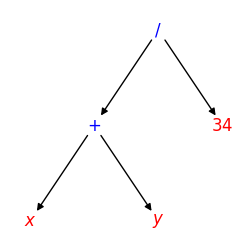

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

def makeGraph(x: tuple, nodes: list, terminate: list, labels: list, links: list) -> int:
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    terminate[id_] = f'${latex_(x)}$'
  else:
    sym = ''

    if x[0] == "div":
      sym = "/"
    elif x[0] == 'add':
      sym = "+"
    elif x[0] == 'sub':
      sym = "-"
    elif x[0] == 'mul':
      sym = "*"
    elif x[0] == 'deg':
      sym = "^"

    labels[id_] = f'${sym}$'
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, terminate, labels, links)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  nodes, terminate, labels, links = [], {}, {}, []
  makeGraph(x, nodes, terminate, labels, links)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(3 * size, 3 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "blue")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = terminate, font_color = "red")

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
alo = (x + y) / Z(34)
drawGraph(alo)

**Задание выполняется в ноутбуке, который был создан при выполнении первого задания!**


### Факторизация

* Напишите функцию `factors(x)`, которая возвращает разложение заданного натурального числа $x$ на простые множители в виде списка этих множителей: factors`(12)` $\to$ `[2, 2, 3]`.

In [17]:
def factors(x: int) -> list:
  fact = []
  for i in range(2, int(x**0.5) + 1):
    while (x % i == 0):
        fact.append(i)
        x //= i

  if (x != 1):
      fact.append(x)

  return fact
factors(7007)

[7, 7, 11, 13]

* Напишите функцию `factorizeInt(x)`, которая преобразует заданное число `x` в произведение простых сомножителей в форме **выражения** (класс `Expression`), повторяющиеся сомножители должны входить в выражение в форме степеней: `factorizeInt(120)` $\to 2^3\cdot 3\cdot 5$.  

In [18]:
def factorizeInt(x: int) -> Expression:
  numbers = factors(x)
  result_list = [Z(numbers[0])]

  prev_num = numbers[0]
  count = 0
  for i in range(1, len(numbers)):
    if numbers[i] == prev_num:
      count += 1
    else:
      if count > 0:
        result_list[-1] = (result_list[-1]**(count+1))
      result_list.append(Z(numbers[i]))
      count = 0
    prev_num = numbers[i]

  result = result_list[0]
  for i in range(1, len(result_list)):
    result *= result_list[i]

  return result

show(factorizeInt(160))

<IPython.core.display.Math object>

### Наибольший общий делитель

* Реализуйте алгоритм Евклида в виде функции `GCD(n, m)`.

In [19]:
def GCD(n: int, m: int) -> int:
  while m > 0:
    n, m = m, n % m
  return n

GCD(1024, 729)

1

### Реализация рациональных чисел

* Создаем функцию-конструктор `rational_(n,m)` узлов для рациональных чисел. В каждом таком узле должно храниться нормализованное представление заданного числа.

In [20]:
def rational_(n: int, m: int) -> tuple:
  if n == 0:
    m = 1 # нормализованное представление нуля - (0, 1)
  else:
    if m < 0:
      n, m = -n, -m # знаменатель должен быть положительным
    c = GCD(abs(n), m)
    n, m = n // c, m // c # приводим дробь к несократимому виду
  return 'rational', {'num': n, 'denom': m} # num - числитель (numerator), denom - знаменатель (denominator)

* Пишем функцию `Q(n,m)` для создания выражения, представляющего рациональное число $n/m$. Знаменатель `m` по умолчанию равен `1`.

In [21]:
def Q(n: int, m: int = 1) -> Expression:
  return Expression(rational_(n, m))

Q(2, -6).T

('rational', {'num': -1, 'denom': 3})

* Напишите функцию `latex_rational(x)`, преобразующую рациональное число $x$ в формат LaTeX. Это преобразование должно учитывать, является ли число целым (единичный знаменатель не используется), для отрицательных чисел знак минус ставится перед числом, а не в числителе:
`Q(0, 5)` $\to 0$, `Q(6, -2)` $\to 3$, `Q(6, 8)` $\to \dfrac{3}{4}$, `Q(-15, 25)` $\to -\dfrac{3}{5}$.

In [22]:
def latex_rational(x: tuple) -> str:
  n, m = options(x)['num'], options(x)['denom']
  minus = ''
  if n < 0 or m < 0:
    minus = '-'

  if abs(m) == 1:
    return f"{minus}{abs(n)}"

  return f"{minus}\\frac{{{abs(n)}}} {{{abs(m)}}}"

show(Q(0, 5))
show(Q(6, -2))
show(Q(6, 8))
show(Q(-15, 25))
show(Q(-15, -25))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем, что рациональные числа могут быть теперь использованы для построения арифметический выражений

In [23]:
show((1 + Q(6, 4)) / (Q(152, 24) ** 2 * Q(5, 7)))

<IPython.core.display.Math object>

### Цепные дроби

* Напишите функцию `continuedTerms(n,m)`, которая преобразует заданное рациональное число $n/m$ в цепную дробь \[$a_0$; $a_1$, $a_2$, ...\] и возвращает результат в виде списка: `continuedTerms(15,11)` $\to$ `[1,2,1,3]`.   

In [24]:
def continuedTerms(n: int, m: int) -> list:
  result = []
  k = 0
  while m > 0:
    ak = n // m # (целая часть от деления)
    n, m = m, n % m
    k = k + 1
    result.append(ak)

  return result


continuedTerms(15, 11)

[1, 2, 1, 3]

* Напишите функцию, которая строит выражение, представляющее цепную дробь, в виде объекта класса `Expression`.

In [25]:
def continuedFraction(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom'] # предполагаем, что p - рациональное число!
  A = continuedTerms(n, m) # находим элементы цепной дроби
  result = Z(A[-1])

  for i in range(len(A)-2, -1, -1):
    result = Z(A[i]) + 1/result

  return result

show(continuedFraction(Q(15, 11)))

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `float2continued(x,n)`, преобразующую заданное действительное число $x$ в цепную дробь "глубины" $n$: `float2continued(np.sqrt(2),4)` $\to 1 + \frac1{2+\frac1{2+\frac1{2}}}$

In [26]:
def float2continued(x: float, n: int) -> Expression:
  continued_fraction = []
  for _ in range(n):
      integer_part = int(x)
      continued_fraction.append(integer_part)
      fractional_part = x - integer_part

      if fractional_part == 0:
          break

      x = 1 / fractional_part

  result = Z(continued_fraction[-1])

  for i in range(len(continued_fraction)-2, -1, -1):
    result = Z(continued_fraction[i]) + 1/result

  return result

show(float2continued(np.pi, 5))
show(float2continued(np.sqrt(2), 5))
show(float2continued(np.exp(1), 5))
show(float2continued((np.sqrt(5)+1)/2, 5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Египетские дроби

* Напишите функцию `egyptianTerms(n,m)` разложения заданного рационального числа $n/m$ (в предположении $n < m$) в египетскую дробь, возвращающую список знаменателей найденных простых дробей: `egyptianTerms(7, 8)` $\to$ `[2, 3, 24]`.

In [27]:
import math
def egyptianTerms(n: int, m: int) -> list:
  result = []
  k = 1
  while n > 0:
    ak = math.ceil(m/n)# int(m / n)+1
    n, m = (-m) % n, m * ak
    k = k + 1
    result.append(ak)
  return result


egyptianTerms(7, 8)

[2, 3, 24]

* Напишите функцию, которая строит выражение, представляющее египетскую дробь, в виде объекта класса `Expression`: `egyptianSum(7,8)` $\to \frac12 + \frac13 + \frac1{24}$.

In [28]:
def egyptianSum(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom']
  A = egyptianTerms(n, m)

  result = 1/Z(A[0])

  for i in range (1, len(A)):
    result += 1/Z(A[i])

  return result

show(egyptianSum(Q(7, 8)))

<IPython.core.display.Math object>

### Частичное оценивание арифметических выражений

В большинстве систем КА выражения, заданные пользователем, сразу же упрощаются, в частности, в них вычисляется все, что может быть вычислено.
В частности, если выражение является арифметическим и содержит только целые и рациональные числа, то это выражение преобразуется в рациональное число, например: $$\frac{\frac12+\frac23}{5}\to\frac7{30}.$$
Определим несколько функций, предназначенных для такого оценивания (evaluating) арифметических выражений над целыми и рациональными числами.

* Головная функция `evaluate(x)` оценивает выражение, заданное пользователем в виде объекта класса `Expression`, и возвращает выражение того же самого типа (класса), вызывая внутреннюю функцию `eval_` оценивания выражения в *списочном* формате.

In [29]:
def evaluate(x: Expression) -> Expression:
  return Expression(eval_(x.T))

* Функция `eval_(x)` “пытается” вызвать обработчик соответствующего узла, и если такой обработчик есть, то возвращается результат его работы.
Если обработчика нет (срабатывает исключение), то возвращается исходный узел.


In [30]:
def eval_(x: tuple) -> tuple:
  try:
    cmd = eval(f"eval_{ID(x)}") # конструируем функцию оценивания текущего узла по его ID
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Для упрощения выполнения арифметических операций над объектами разной природы (числа разных классов, многочлены, матрицы) определим набор функций для автоматического преобразования типов (cast).
Головная функция `cast` пытается вызвать подходящий обработчик, исходя из идентификатора типа и целевого типа.

In [31]:
def cast_(x: tuple, target: str) -> tuple:
  if ID(x) == target:
    return x # преобразование не нужно, узел x уже имеет правильный тип
  try:
    cmd = eval(f"cast_{ID(x)}_{target}") # конструируем функцию преобразования
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Реализуем один конкретный преобразователь `cast_integer_rational(x)`, который переводит целое число $x$ в формат рационального числа.

In [32]:
def cast_integer_rational(x: tuple) -> tuple:
  n = options(x)['value']
  return rational_(n, 1)

cast_integer_rational(integer_(5))

('rational', {'num': 5, 'denom': 1})

* Теперь можно создавать функции, выполняющие арифметические операции над целыми и рациональными числами. Определим две функции сложения. Имя каждой такой функции должно состоять из типа операции и списка типов операндов, разделенных знаком подчеркивания: `add_integer_integer` складывает два целых числа.

In [33]:
def add_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n + m)

def add_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb + nb * ma, ma * mb
  return rational_(n, m)

* Создадим словарь `OPERATIONS`, в котором будут перечисляться все обработчики каждой бинарной и унарной операций, подлежащих оцениванию. Ключами записей будут типы операций, значениями - списки соответствующих обработчиков.

In [34]:
OPERATIONS = {'add': ['add_integer_integer', 'add_rational_rational']}

* Создаем универсальный обработчик (оцениватель) бинарных операций `eval_binary(op,x,y)`, который просматривает список всех имеющихся обработчиков заданной операции `op`, для каждого из них пытается преобразовать заданные операнды `x` и `y` к соответствующим типам, если преобразование проходит успешно, то вызывает этот обработки и возвращает его результат. Если ни один из обработчиков не срабатывает, то возвращается исходное выражение.   

In [35]:
def eval_binary(op: str, x: tuple, y: tuple) -> tuple:
  for fop in OPERATIONS[op]:
    idx, idy = fop.split('_')[1:]
    a = cast_(x, idx)
    b = cast_(y, idy)
    if ID(a) == idx and ID(b) == idy:
      cmd = eval(f"{fop}")
      return cmd(a, b)
  return op, x, y

* Наконец, пишем оцениватель `eval_add` операции сложения, который оценывает (рекурсивно) свои операнды и вызывает универсальный обработчик `eval_binary`. Проверяем его работу. Объясните, почему не происходит оценивания в последнем примере!

In [36]:
def eval_add(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) + Q(1, 3)))
x = symbol('x')
show(evaluate(Z(2) + Z(5) + x))
show(evaluate(x + Z(2) + Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Чтобы добавить в систему обработку новых операций (например, операции умножения), нужно 1) создать соответствующие исполнители (умножение целых чисел, умножение рациональных чисел); 2) включить эти исполнители в словарь `OPERATIONS`; 3) написать обработчик соответствующего узла (`eval_mul`), если эта операция бинарная, то в данном обработчике должна вызываться функция `eval_binary`. Для примера добавим в систему оценивание операции умножения.

In [37]:
def mul_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n * m)

def mul_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return rational_(n, m)

OPERATIONS |= {'mul': ['mul_integer_integer', 'mul_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_mul(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) * Z(5)))
show(evaluate(Z(2) * Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте по этой же схеме оценивание операций вычитания и деления целых и рациональных чисел. Учтите, что при делении двух целых чисел может получиться целое число: $6/3 \to 2$, а может - рациональное: $12/8$ $\to \frac{3}{2}$.

In [38]:
# вычитание

def sub_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n - m)

def sub_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb - nb * ma, ma * mb
  return rational_(n, m)

OPERATIONS |= {'sub': ['sub_integer_integer', 'sub_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_sub(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)


show(evaluate(Z(2) - Q(2, 7)))

<IPython.core.display.Math object>

In [39]:
# деление

def div_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']

  return rational_(n, m)

def div_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb, ma * nb
  return rational_(n, m)

OPERATIONS |= {'div': ['div_integer_integer', 'div_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_div(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(6) / Z(3)))
print()
show(evaluate(Z(6) / Z(4)))
print()
show(evaluate(Q(5,12) / Q(10,81)))
print()
show(evaluate((Z(6) - Q(1, 2)) / Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание операции возведения в целую степень: `Z(2) ** Z(3)` $\to 8$, `Z(2) ** Z(-3)` $\to \frac{1}{8}$, `Q(2, 3) ** Z(-2)` $\to \frac{9}{4}$.

In [40]:
def deg_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']

  if m >= 0:
    return integer_(n**m)
  else:
    return rational_(1, n**abs(m))

def deg_rational_integer(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  b = options(b)['value']

  if b >= 0:
    n, m = na**b, ma**b
  else:
    n, m = ma**abs(b), na**abs(b)

  return rational_(n, m)

OPERATIONS |= {'deg': ['deg_integer_integer', 'deg_rational_integer', 'deg_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_deg(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(6) ** Z(3)))
show(evaluate(Z(6) ** Z(-2)))
show(evaluate(Q(2, 3) ** Z(-2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте оценивание операции возведения в рациональную степень, при условии, что соответствующие корни могут быть извлечены: `Z(8) ** Q(1, 3)` $\to 2$, `Q(4, 9) ** Q(-3, 2)` $\to \frac{27}{8}$. **Но** `Z(4) ** Q(1, 3)` $\to 4^{\frac{1}{3}}$  - операция не может быть оценена.

In [41]:
def deg_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']

  if ((na > 0 and ma < 0) or (na < 0 and ma > 0)) and mb % 2 == 0:
      return rational_(na, ma) ** rational_(nb, mb)

  if ((na < 0 and ma < 0) or (na > 0 and ma > 0)) or mb % 2 == 1:
    if (nb < 0 and mb > 0) or (nb > 0 and mb < 0):
      n, m = ma ** abs(nb / mb), na ** abs(nb / mb)
    else:
      n, m = na ** (nb / mb), ma ** (nb / mb)

    if int(n) == n and int(m) == m:
      return rational_(int(n), int(m))
    else:
      return rational_(na, ma) ** rational_(nb, mb)

  return rational_(na, ma) ** rational_(nb, mb)



show(evaluate(Z(25) ** Q(3, 2)))
print()
show(evaluate(Z(8) ** Q(1, 3)))
print()
show(evaluate(Q(4, 9) ** Q(-3, 1)))
print()
show(evaluate(Z(4) ** Q(1, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте по аналогичной схеме универсальный оцениватель унарных операций `eval_unary` и оцениватель операции `neg` (унарный минус) для целых и рациональных чисел.  

In [42]:
def neg_integer(a: tuple) -> tuple:
  n = options(a)['value']
  return integer_(-n)

def neg_rational(a: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  n, m = na, ma
  return rational_(-n, m)

OPERATIONS |= {'neg': ['neg_integer', 'neg_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_unary(op: str, x: tuple) -> tuple:
  for fop in OPERATIONS[op]:
    idx = fop.split('_')[1]
    a = cast_(x, idx)
    if ID(a) == idx:
      cmd = eval(f"{fop}")
      return cmd(a)
  return op, x

def eval_neg (x: tuple) -> tuple:
  a = eval_(x[1])
  return eval_unary(ID(x), a)

show(evaluate(-Z(-2)))
show(evaluate(-Q(3, 4)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Булева логика, константы, операции

* Создаем тип данных для логических констант 1 (true) и 0 (false). Слово bool является ключевым в Python, поэтому используем длинный вариант boolean. Но идентификатор типа будет строка "bool".    

In [43]:
def boolean_(x: bool) -> tuple:
  x = 1 if x else 0
  return 'bool', {'value': x}

def boolean(x: bool) -> Expression:
  return Expression(boolean_(x))

* Напишите функцию преобразования логических констант в формат LaTeX. Чтобы отличать логические 0 и 1 от соответствующих чисел, будем их изображать полужирным шрифтом (см. код этой вкладки): 0 $\to \mathbb{0}$, 1 $\to \mathbb{1}$

In [44]:
def latex_bool(x: tuple) -> str:
  return f"\\bold{{{options(x)['value']}}}"

* Определяем логические константы I и O

In [45]:
I, O = boolean(True), boolean(False)
show(I + O)
show(Z(1) + Z(0)) # для сравнения - числовые 0 и 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функции преобразования логических операций `and`, `or`, `xor`, `inv` в формат LaTeX (см. код этой вкладки): $$x \wedge y,\, x \vee y,\, x \oplus y,\, \overline{x}.$$ Убедитесь, что приоритет этих операций настроен правильно: `(x | y) & x` $\to (x \vee y) \wedge x$. Вместо знака конъюнкции $\wedge$ можно использовать знак умножения $\cdot$ (точку).

In [46]:
# def latex_and(x: tuple) -> str:
#   return f"\\wedge{{{options(x)['value']}}}"

# def latex_or(x: tuple) -> str:
#   return f"\\vee{{{options(x)['value']}}}"

# def latex_xor(x: tuple) -> str:
#   return f"\\oplus{{{options(x)['value']}}}"

# def latex_inv(x: tuple) -> str:
#   return f"\\overline{{{options(x)['value']}}}"

* Проверяем:

In [47]:
x, y = symbol('x'), symbol('y')

f = x & y ^ (O | ~x)
show(f)
#drawGraph(f)

<IPython.core.display.Math object>

### Оценивание логических выражений

* По аналогии с оценкой арифметических выражений напишите функции оценки всех четырех логических операций. Для оценки бинарных операций используйте написанную ранее функцию `eval_binary`, которая автоматически выполняет поиск нужного оценщика и проводит преобразование типов операндов.

In [48]:
# добавляем "оценщиков" к словарю бинарных операций OPERATIONS
OPERATIONS |= {'and': ['and_bool_bool'], 'or': ['or_bool_bool'], 'xor': ['xor_bool_bool'], 'inv': ['inv_bool']}

def and_bool_bool(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n & m)

def eval_and(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def or_bool_bool(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n | m)

def eval_or(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def xor_bool_bool(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n ^ m)

def eval_xor(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def inv_bool(a: tuple) -> tuple:
  n = options(a)['value']
  return boolean_(~n)

* Напишите оцениватель логического отрицания, операция унарная, поэтому все оценивание выполняется внутри одной функции

In [49]:
def eval_inv(x: tuple) -> tuple:
  a = eval_(x[1])
  return eval_unary(ID(x), a)

* Проверяем:

In [50]:
f = (~I | I) ^ (O & I)
show(f)
show(evaluate(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `cast_integer_bool` для преобразования целых чисел в логические константы (как в языках C/C++): ноль преобразуется в логический ноль, все остальные числа - в логическую единицу

In [51]:
def cast_integer_bool(x: tuple) -> tuple:
  n = options(x)['value']
  return boolean_(n)

f = Z(2) ^ Z(1) | Z(10)
show(f)
show(evaluate(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Таблицы истинности

* Для построения таблицы истинности заданного логического выражения нам потребуется выполнять многократные подстановки в этом выражении каких-то значений вместо имен переменных. Напишем универсальную функцию подстановки `subs` (от английского substitute). Головная `subs` принимает на вход выражение `F` и словарь `V`, ключами в котором являются имена заменяемых переменных, а значениями - выражения, на которые эти переменные будут меняться (см. пример ниже).

* **ВАЖНО!!!** Чтобы объекты типа `Expression` можно было использовать в качестве ключей словаря, они должны быть *хешируемыми*. Т.к. мы переопределили операцию равенство (метод `__eq__` класса `Expression`), то класс стал нехешируемым. Чтобы исправить ситуацию, надо вручную добавить к **вашему определению** класса `Expression` метод `__hash__`, который преобразует наше списочное выражение в строку и вычисляет хеш от полученной строки:

```
class Expression:
  ...

  def __hash__(self):
    return hash(str(self.T))
```

In [52]:
def subs(F: Expression, V: dict) -> Expression:
  # преобразуем словарь V в списочную форму v
  v = {options(k.T)['name']: fix(V[k]).T for k in V}
  # вызываем списочную функцию подстановки
  return Expression(subs_(F.T, v))

def subs_(F: tuple, V: dict) -> tuple:
  # рекурсивная функция
  # если узел - переменная, ищем ее в словаре
  if ID(F) == 'symbol':
    n = options(F)['name']
    if n in V:
      # если переменная есть в словаре, то заменяем ее на соответствующее значение
      return V[n]
    else:
      # иначе оставляем как есть
      return F
  # если узел - не переменная, то рекурсивно вызываем ту же функцию для всех дочерних узлов
  A = [subs_(a, V) for a in items(F)]
  # и возвращаем такой же узел, но с обновленными дочерними поддеревьями
  return ID(F), *A, options(F)

# проверяем

x, y = symbol('x'), symbol('y')
f = x * y
show(f)
g = subs(f, {x: 1 + y ** 2})
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Пишем функцию `makeTable(F: Expression, V: list)` для преобразования заданного логического выражения в таблицу истинности. По числу переменных вычисляем высоту таблицы, делаем цикл по ее строкам. Номер строки представляем в двоичной форме, каждая цифра этого представления подставляется вместо соответствующей переменной в исходное выражение. Полученное константное выражение оценивается и преобразуется в 0 или 1. Из значений переменных и вычисленного значения выражения формируется строка таблицы, например, `000|1`. Выходом функции является список всех строк искомой таблицы истинности.

In [53]:
def makeTable(F: Expression, V: list) -> list:
  n = len(V) # число переменных, определяет высоту таблицы (2^n)
  table = [] # список строк
  for i in range(2 ** n): # цикл по строкам таблицы истинности
    A = ('0' * n + bin(i)[2:])[-n:] # преобразование номера строки в двоичное число в n разрядах, как это работает?
    S = {x: boolean(int(a)) for x, a in zip(V, A)} # словарь для замены
    f = options(evaluate(subs(F, S)).T)['value'] # замена + оценивание + преобразование в цифру 0 или 1
    table.append(f"{A}|{f}") # добавляем строку к таблице
  return table

* Напишите функцию `boolTable(F: Expression, V: list) -> None`, которая бы строила таблицу истинности выражения `F` и выводила ее на экран. Например, вызов `boolTable(x ^ y ^ ~z, [x, y, z])` должен печатать следующую таблицу:

```
000|1
001|0
010|0
011|1
100|0
101|1
110|1
111|0
```

In [54]:
def boolTable(F: Expression, V: list) -> None:
  table = makeTable(F, V)
  for row in table:
    print(row)

x, y, z = symbol('x'), symbol('y'), symbol('z')
f = x ^ y ^ ~z
show(f)
boolTable(f, [x, y, z])

<IPython.core.display.Math object>

000|1
001|1
010|0
011|0
100|0
101|0
110|1
111|1


* (бонусное задание) напишите рекурсивную функцию `getVariables(F: Expression) -> list`, которая бы составляла список всех переменных, входящих в заданное выражение. Модифицируйте функцию `makeTable`, чтобы она принимала на вход только выражение, а список переменных составлялся бы автоматически.

### СДНФ

* Напишите функцию `DNF(V: list, F: str) -> Expression`, которая строит по заданному списку переменных `V` и заданному столбцу таблицы истинности `F` СДНФ. Если все значения в `F` равны нулю, функция должна возвращать логический ноль. Примеры: `DNF([x, y], '0110')` $\to \overline{x} \cdot y \vee x \cdot \overline{y}$, `DNF([x, y], '0110')` $\to \mathbf{0}$. Для получения списка значений переменных в строке таблицы с номером `i` используйте аналогичное преобразование из функции `makeTable` (пятая строка кода).


In [55]:
def DNF(V: list, F: str) -> Expression:
  n = len(V)
  result = None
  isFirst = True
  for i in range(2 ** n):
    if F[i] == '1':
      A = ('0' * n + bin(i)[2:])[-n:]
      S = {x: boolean(int(a)) for x, a in zip(V, A)}
      if A[0] == '0':
          r = ~V[0]
      else:
          r = V[0]
      for j in range(1, n):
        if A[j] == '0':
          r = r & ~V[j]
        else:
          r = r & V[j]
      if isFirst:
        result = r
        isFirst = False
      else:
        result = result | r

  if isFirst:
    result = Z(0)

  return result


x, y = symbol('x'), symbol('y')
f = DNF([x, y], '0110')
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Напишите аналогичную функцию `CNF(V: list, F: str) -> Expression`для построения СКНФ по заданной таблице истинности. Принцип двойственности: конъюнкции заменяются на дизъюнкции и наоборот, логический 0 заменяется на 1 и наоборот. Пример: `CNF([x, y], '0110')` $\to \left( x \vee y \right) \cdot \left( \overline{x} \vee \overline{y} \right)$

In [56]:
def CNF(V: list, F: str) -> Expression:
  n = len(V)
  result = None
  isFirst = True
  for i in range(2 ** n):
    if F[i] == '0':
      A = ('0' * n + bin(i)[2:])[-n:]
      S = {x: boolean(int(a)) for x, a in zip(V, A)}
      if A[0] == '0':
          r = ~V[0]
      else:
          r = V[0]
      for j in range(1, n):
        if A[j] == '0':
          r = r | ~V[j]
        else:
          r = r | V[j]
      if isFirst:
        result = r
        isFirst = False
      else:
        result = result & r

  if isFirst:
    result = Z(1)

  return result

x, y = symbol('x'), symbol('y')
f = CNF([x, y], '0110')
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `ZP(V: list, F: str) -> Expression`, преобразующую заданную таблицу истинности в полином Жегалкина. Пример: `ZP([x, y], '1110')` $\to \mathbf{1} \oplus x \cdot y$

In [57]:
# def ZP(V: list, F: str) -> Expression:
#   ...

# x, y = symbol('x'), symbol('y')
# f = ZP([x, y], '1110')
# show(f)

### Неравенства

* Напишите набор функций для представления операций сравнения ($x=y$, $x\ne y$, $x\lt y$, $x\le y$, $x \gt y$, $x \ge y$). Примеры:
 * `show(x != y)` $\to x \ne y$
 * `show(Z(1) < Z(2))` $\to 1 \lt 2$
 * `show((Z(1) < Z(2)) & (Z(4) >= Z(5)))` $\to (1 \lt 2) \wedge (4 \ge 5) $


In [58]:
...

x, y = symbol('x'), symbol('y')
show(x != y)
show(Z(1) < Z(2))
show((Z(1) < Z(2)) & (Z(4) >= Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите набор функций для оценивания операций сравнения целых и рациональных чисел. Результат оценивания - логическая константа. Примеры:
 * `show(evaluate(Z(1) < Z(2)))` $\to \mathbb{1}$
 * `show(evaluate((Z(1) < Z(2)) & (Z(4) >= Z(5))))` $\to \mathbb{0}$

In [59]:
OPERATIONS |= {'eq': ['eq_integer_integer'], 'ne': ['ne_integer_integer'], 'lt': ['lt_integer_integer'], 'le': ['le_integer_integer'], 'gt': ['gt_integer_integer'], 'ge': ['ge_integer_integer']}

def eq_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n == m)

def eval_eq(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def ne_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n != m)

def eval_ne(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def lt_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n < m)

def eval_lt(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def le_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n <= m)

def eval_le(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def gt_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n > m)

def eval_gt(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def ge_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n >= m)

def eval_ge(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(1) < Z(2)))
show(evaluate((Z(1) < Z(2)) & (Z(4) >= Z(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Селекторы (бонусное задание)

Выражение-селектор представляет собой последовательность пар (условие, выражение) и служит для выбора первого выражения, для которого выполняется соответствующее условие. Пример использования селекторов:
$$|x| = \cases{x,\,\mbox{ if } x \ge 0,\\ -x, \,\mbox{ if } x \lt 0.}$$
Или в сокращенном варианте (последнее выражение используется без условия, вариант команды else):
$$\mathrm{sign}(x) = \cases{1, \,\mbox{ if } x \gt 0,\\ 0,\,\mbox{ if } x = 0,\\ -1\,\mbox{ else}.}$$

* Функция `select_(*args)` создает списочное выражение-селектор для заданной последовательности нечетного числа аргументов: выражение_0, условие_0, выражение_1, условие_1, ..., выражение_n.
* Функция `select(*args)` создает аналогичное выражение-селектор типа `Expression`.
* Функция `latex_select` преобразует выражение в формат LaTeX (в линейной форме!)

In [60]:
def select_(*args) -> tuple:
  return 'select', *args, {}

def select(*args) -> Expression:
  A = [fix(a).T for a in args]
  return Expression(select_(*A))

def latex_select(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  s = ""
  for i in range(len(A) // 2):
    s += f"{{{A[2 * i]}}} \\mathbf{{\\,if\\,}} {{{A[2 * i + 1]}}};"
  s += f"{{{A[-1]}}} \\mathbf{{\\,else}}"
  return f"\\left[{s}\\right]"

x = symbol('x')
f = select(Z(1), x > 0, Z(0), x == 0, Z(-1))
show(f)

<IPython.core.display.Math object>

* Напишите функцию `eval_select(x: tuple)` для оценивания выражений-селекторов. Пример для выражения `f` из предудыщей вкладки: `evaluate(subs(f, {x: Z(-100)}))` $\to -1$.


In [61]:
def eval_select(x: tuple) -> tuple:
  a = eval_(x[1])
  return eval_unary(ID(x), a)

show(evaluate(subs(f, {x: Z(3)})))
show(evaluate(subs(f, {x: Z(-100)})))
show(evaluate(subs(f, {x: Z(0)})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Множества

* Реализуем конечные множества (конструктор, конструктор списочный, преобразование в LaTeX, оценка). Оценка множества - оценивание каждого элемента множества.

In [62]:
def fset_(*args) -> tuple:
  return 'fset', *args, {}

def fset(*args) -> Expression:
  A = [fix(a).T for a in args]
  return Expression(fset_(*A))

def latex_fset(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  return f"\\left\\{{ {','.join(A)} \\right\\}}"

def eval_fset(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  return fset_(*A)

A = fset(1, Q(2,5) + Q(8, 5), 3)
show(A)
show(evaluate(A))
show(fset())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Добавьте к данной реализации функцию нормализации, которая должна удалять из множества повторяющиеся элементы (множество - это набор РАЗНЫХ элементов). Проверку на равенство элементов используйте элементарную - поэлементное равенство двух структур (или равенство строковых представлений этих структур). Вызов функции нормализации вставьте в списочный конструктор.

### Операции над конечными множествами

Операции (дополнение, объединение, пересечение, разность, симметрическая разность) будем реализовывать в виде **функций** (inversion, union, intersection, setdiff, symdiff), а не **бинарных операций**. Рассмотрим процесс на примере реализации операции объединения.

* Определяем приоритеты операций (для визуализации формул)
* Пишем конструкторы
* Пишем преобразование в LaTeX

In [63]:
priority['union'] = 3

def union_(x: tuple, y: tuple) -> tuple:
  return 'union', x, y, {}

def union(x: Expression, y: Expression) -> Expression:
  return Expression(union_(fix(x).T, fix(y).T))

def latex_union(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\cup {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(union(x, y))

<IPython.core.display.Math object>

* Реализуйте по аналогии с объединением все остальные операции над множествами

In [64]:
priority['inversion'] = 4

def inversion_(x: tuple) -> tuple:
  return 'inversion', x, {}

def inversion(x: Expression) -> Expression:
  return Expression(inversion_(fix(x).T))

def latex_inversion(x: tuple) -> str:
  a = latex_(x[1])
  return f"\\neg{{{a}}}"

x, y = symbol('X'), symbol('Y')
show(inversion(x))



priority['intersection'] = 3

def intersection_(x: tuple, y: tuple) -> tuple:
  return 'intersection', x, y, {}

def intersection(x: Expression, y: Expression) -> Expression:
  return Expression(intersection_(fix(x).T, fix(y).T))

def latex_intersection(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\cap {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(intersection(x, y))


priority['setdiff'] = 3

def setdiff_(x: tuple, y: tuple) -> tuple:
  return 'setdiff', x, y, {}

def setdiff(x: Expression, y: Expression) -> Expression:
  return Expression(setdiff_(fix(x).T, fix(y).T))

def latex_setdiff(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\setminus {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(setdiff(x, y))



priority['symdiff'] = 3

def symdiff_(x: tuple, y: tuple) -> tuple:
  return 'symdiff', x, y, {}

def symdiff(x: Expression, y: Expression) -> Expression:
  return Expression(symdiff_(fix(x).T, fix(y).T))

def latex_symdiff(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\triangle {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(symdiff(x, y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишем функцию оценивания операции объединения (`eval_union`)

In [65]:
def eval_union(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2]) # оцениваем операнды
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {} # если операнды не конечные множества, то ничего не делаем
  A, B = list(items(a)), list(items(b)) # преобразуем в списки
  C = A[:] # копируем все элементы из A в C
  for b in B: # цикл по всем элементам b из B
    inA = False
    for a in A:
      if b == a:
        inA = True # нашли в A элемент b
        break
    if not inA:
      C.append(b) # если не нашли b в A, то добавляем b в C
  return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = union(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

* Реализуйте оценивание остальных операций над множествами

In [66]:
def eval_intersection(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2]) # оцениваем операнды
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {} # если операнды не конечные множества, то ничего не делаем
  A, B = list(items(a)), list(items(b)) # преобразуем в списки
  C = [] # копируем все элементы из A в C
  for b in B: # цикл по всем элементам b из B
    inA = False
    for a in A:
      if b == a:
        inA = True # нашли в A элемент b
        break
    if inA:
      C.append(b) # если не нашли b в A, то добавляем b в C
  return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = intersection(A, B)
show(C == evaluate(C))



def eval_setdiff(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2]) # оцениваем операнды
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {} # если операнды не конечные множества, то ничего не делаем
  A, B = list(items(a)), list(items(b)) # преобразуем в списки
  C = A[:] # копируем все элементы из A в C
  for b in B: # цикл по всем элементам b из B
    inA = False
    for a in A:
      if b == a:
        inA = True # нашли в A элемент b
        break
    if inA:
      C.remove(b) # если не нашли b в A, то добавляем b в C
  return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = setdiff(A, B)
show(C == evaluate(C))



def eval_symdiff(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2]) # оцениваем операнды
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {} # если операнды не конечные множества, то ничего не делаем
  A, B = list(items(a)), list(items(b)) # преобразуем в списки
  C = A[:] # копируем все элементы из A в C

  for b in B: # цикл по всем элементам b из B
    inA = False
    for a in A:
      if b == a:
        inA = True # нашли в A элемент b
        break
    if not inA:
      C.append(b)
    else:
      C.remove(b) # если не нашли b в A, то добавляем b в C
  return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = symdiff(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте быстрый вариант оценивания операций через предварительную сортировку элементов множества (см. презентацию лекции). Проведите сравнение двух реализаций по времени выполнения операций для больших множеств `A = fset(*list(range(0, n)))`, `B = fset(*list(range(0, 2 * n, 2)))`, для значений `n` из набора [10, 100, 1000, 10000].

In [67]:
...

Ellipsis

### Другие "типы" множеств

Реализуйте представление множеств следующих типов (только конструкторы и преобразователи в LaTeX):

* Множества-константы (`cset`): $\mathbb{N}$, $\mathbb{Z}$, $\mathbb{Q}$, $\mathbb{R}$, $\varnothing$.
* Интервальные множества (`iset`): $(-\infty, 0) \cup (1, 2]$. Задаются набором пар границ и их типов (закрытые/открытые). Также нужно будет определить специальный объект - бесконечность, `infinity`.
* Параметрические множества (`pset`): $\{2n+1\,|\,n\in \mathbb{Z}\}$. Задаются тремя элементами - выражением ($2n+1$), переменной ($n$), множеством ($\mathbb{Z}$).
* Условные множества (`aset`): $\{x\in\mathbb{R}\,|\,x>0\}$. Задаются тремя элементами - переменной, множеством, условием.

In [68]:
...

Ellipsis

* (бонусное задание) Реализуйте оценивание множественных операций над интервальными множествами.

In [69]:
...

Ellipsis

### Матрицы

* Пишем конструктор матриц произвольного размера, входом является список элементов и рамеры матрицы.

In [70]:
def matrix_(A: list, n: int, m: int) -> tuple:
  return 'matrix', *A, {'dim': (n, m)}

def matrix(A: list, n: int, m: int) -> Expression:
  B = [fix(a).T for a in A]
  return Expression(matrix_(B, n, m))

* Реализуйте функцию преобразования матрицы в формат LaTeX. Пример: `matrix([1, 2, 3, 4], 2, 2)` $\to \left[\begin{array}{cc} 1 & 2 \\ 3 & 4 \\\end{array}\right]$ (см. код вкладки).

In [71]:
def latex_matrix(x: tuple) -> str:
  A = items(x)
  n, m = options(x)['dim']
  if len(A) != n * m:
    return "error"

  result = ""
  count = 0
  for i in range(len(A)):
    y = latex_(A[i])

    count += 1
    if count == m:
      result = result + str(y) + " \\\ "
      count = 0
    else:
      result = result + str(y) + " & "

  return f"\\left[\\begin{{array}}{{cc}} {result} \\end{{array}}\\right]"

A = matrix([1, 2, 3, 4, 5, 6], 3, 2)
show(A)

<IPython.core.display.Math object>

* Напишите функции-конструкторы векторов (`cvector` - столбцы, `rvector` - строки), аргументом является список значений, длина вычисляется автоматически. Внутренним представлением должна быть **матрица**, у которой одна из размерностей будет равна единице (т.е. новый тип объектов создавать не нужно). Пример:
`cvector([1, 2]).T` $\to$ `('matrix', ('integer', {'value': 1}), ('integer', {'value': 2}), {'dim': (2, 1)})`.

In [72]:
def cvector(A: list) -> Expression:
  return matrix(A, len(A), 1)

def rvector(A: list) -> Expression:
  return matrix(A, 1, len(A))

show(cvector([1, 2, 3, 4]))
show(rvector([1, 2, 3, 4]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `eval_matrix`, выполняющую оценивание элементов матрицы.

In [73]:
def eval_matrix(x: tuple) -> tuple:
  A = items(x)
  n, m = options(x)['dim']
  B = []
  for i in range(len(A)):
    B.append(eval_(A[i]))

  return matrix_(B, n, m)

A = matrix([1, Z(2) * Z(7), 3, 4], 2, 2)
show(A)
show(evaluate(A))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание арифметических операций над матрицами: умножение на число, сложение, вычитание, умножение.

In [74]:
def add_matrix_matrix(A: tuple, B: tuple) -> tuple:
  A_items = items(A)
  na, ma = options(A)['dim']
  B_items = items(B)
  nb, mb = options(B)['dim']

  if nb != na or mb != ma:
    return "error"

  C = []

  for i in range(len(A_items)):
    C.append(add_(A_items[i], B_items[i]))

  return eval_(matrix_(C, na, ma))

OPERATIONS['add'].append('add_matrix_matrix')

A = matrix([Q(2, 3), 3, 4, Q(-1, 4)], 2, 2)
B = matrix([1, 1, 1, 1], 2, 2)
C = A + B
show(C)
print()
show(evaluate(C))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [75]:
def sub_matrix_matrix(A: tuple, B: tuple) -> tuple:
  A_items = items(A)
  na, ma = options(A)['dim']
  B_items = items(B)
  nb, mb = options(B)['dim']

  if nb != na or mb != ma:
    return "error"

  C = []

  for i in range(len(A_items)):
    C.append(sub_(A_items[i], B_items[i]))

  return eval_(matrix_(C, na, ma))

OPERATIONS['sub'].append('sub_matrix_matrix')

A = matrix([Q(2, 3), 3, 4, Q(-1, 4)], 2, 2)
B = matrix([1, 1, 1, 1], 2, 2)
C = A - B
show(C)
print()
show(evaluate(C))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [76]:
def mul_matrix_integer(A: tuple, B: tuple) -> tuple:
  A_items = items(A)
  na, ma = options(A)['dim']
  B_int = options(B)['value']

  C = []

  for i in range(len(A_items)):
    C.append(mul_(A_items[i], B))

  return eval_(matrix_(C, na, ma))

OPERATIONS['mul'].append('mul_matrix_integer')

A = matrix([Q(2, 3), 3, 4, Q(-1, 4)], 2, 2)
B = matrix([1, 1, 1, 1], 2, 2)
X = Z(3)
C = A * X
show(C)
print()
show(evaluate(C))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [77]:
def mul_matrix_matrix(A: tuple, B: tuple) -> tuple:
  A_items = items(A)
  na, ma = options(A)['dim']
  B_items = items(B)
  nb, mb = options(B)['dim']

  if ma != nb:
    return "error"

  C = [integer_(0) for _ in range(na * mb)]
  count = 0
  for i in range(na):
    i_count = i * ma
    for j in range(mb):
      for k in range(nb):
        C[count] = add_(C[count], mul_(A_items[i_count + k], B_items[j + k*mb]))
      count += 1

  return eval_(matrix_(C, na, mb))

OPERATIONS['mul'].append('mul_matrix_matrix')

A = matrix([Q(2, 3), 3, 4, Q(-1, 4), 1, 1], 3, 2)
B = matrix([1, 1, 1, Q(6, 7), 1, 1], 2, 3)
C = A * B
show(C)
print()
show(evaluate(C))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте представление и оценивание операции транспонирования матрицы `transpose`

### Решение систем линейных уравнений методом Гаусса

* Пишем головную функцию `solveLinearSystem`, вызывающую списочный вариант этой функции и выполняющий оценку результата.

In [78]:
def solveLinearSystem(A: Expression, b: Expression) -> Expression:
  x = solveLinearSystem_(A.T, b.T)
  return Expression(eval_(x))


* Напишите основную функцию `solveLinearSystem_`, реализующую сам метод Гаусса. Т.к. алгоритм должен работать в символьной форме (со списочными выражениями, а не с числами), то вместо знаков арифметических операций нужно использовать списочные функции `add_`, `mul_` и т.д.

In [79]:
def solveLinearSystem_(A: tuple, b: tuple) -> tuple:
  x = list(items(b)) # преобразуем b в список
  n = len(x) # размер системы
  C = [list(items(A)[i * n: (i + 1) * n]) for i in range(n)] # преобразуем A в двумерный список (список списков) C
  # теперь: матрица системы хранится в списке C, правая часть - в списке x
  # прямой ход
  for k in range(n):
    for j in range(k+1, n):
      C[k][j] = div_(C[k][j], C[k][k])
    x[k] = div_(x[k], C[k][k])
    for i in range(k+1, n):
      for j in range(k+1, n):
        C[i][j] = sub_(C[i][j], mul_(C[i][k], C[k][j]))
      x[i] = sub_(x[i], mul_(C[i][k], x[k]))
  # обратный ход
  for k in range(n - 1, -1, -1):
    for j in range(k+1, n):
      x[k] = sub_(x[k] , mul_(x[j], C[k][j]))

  return matrix_(x, n, 1)


* Проверяем (на выходе должен быть вектор-столбец `[1, 1]`):

In [80]:
A = matrix([1, 2, 3, 4], 2, 2)
b = cvector([3, 7])
show(A == b)
x = solveLinearSystem(A, b)
show(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Наша реализация позволяет решать и системы с параметрами (пока без упрощения результата):

In [81]:
p, q, x = symbol('p'), symbol('q'), symbol('x')
A = matrix([p, 1, 1, q], 2, 2)
b = cvector([1, 1])
show(A * x == b)
x = solveLinearSystem(A, b)
show(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Представление многочленов

* Напишем набор функций для проверки, является ли заданное выражение нулем (без его вычислений и упрощений). Головная функция работает с выражениями типа `Expression`, а служебные функции должны проверять на равенство нулю конкретные списочные объекты. Нулевыми могут быть целые числа, рациональные числа, матрицы, многочлены и т.д. Сравнение многочлена с нулем реализуем ниже.

In [82]:
def isZero(x: Expression) -> bool:
  return is_zero(x.T)

def is_zero(x: tuple) -> bool:
  try:
    cmd = eval(f"is_zero_{ID(x)}")
    return cmd(x)
  except:
    return False

def is_zero_integer(x: tuple) -> bool:
  return options(x)["value"] == 0

def is_zero_rational(x: tuple) -> bool:
  return options(x)["num"] == 0

print(isZero(Z(0)), isZero(Z(1)), isZero(Q(1, 2)), isZero(Q(0, 1)))

True False False True


* Пишем конструкторы многочленов, головная функция принимает на вход список коэффициентов (в порядке от младшего к старшему): `[1, 2, 3]` $\to 3x^2+2x+1$, и опционально переменную и порядок слагаемых для визуализации формулы (`rev=True` $\to 1+2x+3x^2$). Списочный конструктор преобразует все целые коэффициенты в рациональные (чтобы упростить последующие манипуляции с многочленами),вызывает функцию нормализации, которая должна удалить все **старшие** нули из списка коэффициентов: (`[1, 2, 3, 0, 0]` -> `[1, 2, 3]`), и создает кортеж, в котором первым элементом (не считая ID) идет переменная, а дальше перечисляются все коэффициенты многочлена. Если в многочлене все коэффициенты нулевые, то это нулевой многочлен и он представляется пустым списком коэффициентов.

In [83]:
def polynomial(A: list, var: Expression = symbol('x'), rev = False) -> Expression:
  C = [fix(a).T for a in A]
  return Expression(polynomial_(C, var.T, rev))

def polynomial_(A: list, var: tuple = symbol_('x'), rev: bool = False) -> tuple:
  B = [cast_integer_rational(a) if ID(a) == 'integer' else a for a in A]
  C = normalize_polynomial(B)
  return ('polynomial', var, *C, {'rev': rev})

def normalize_polynomial(A: list) -> list:
  # используйте функцию is_zero для проверки элемента на равенство нулю
  B = []
  isContinue = False
  for i in range(len(A)-1, -1, -1):
    if is_zero(A[i]) and not isContinue:
      continue
    B.append(A[i])
    isContinue = True
  B.reverse()
  return B

p = polynomial([1, 0, 3, 0, 0])
for t in items(p.T):
  show(Expression(t))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишем функцию `linear_combination` для построения линейных комбинаций (в списочном представлении): заданы два списка выражений, надо построить выражение, являющееся суммой попарных произведений соответствующих элементов этих двух списков: $[1, 2, 3], [x^2, x, 1] \to x^2 + 2x + 3$. Эта функция будет использоваться нами, в частности, для визуализации многочленов. Результирующее выражение должно быть построено в максимально естественном виде: если один из сомножителей равен нулю, то данное произведение в линейную комбинацию не включается; если один из сомножителей равен единице, то он не включается в произведение; если первый коэффициент - отрицательное число, то он заменяется на свой модуль, а слагаемое включается в сумму через вычитание (а не сложение) и т.д. Если все слагаемые нулевые, то выходом должно быть число 0.

In [84]:
def linear_combination(A: list, B: list) -> tuple:
  A = [cast_integer_rational(a) if ID(a) == 'integer' else a for a in A]
  B = [cast_integer_rational(b) if ID(b) == 'integer' else b for b in B]
  sum = None
  for a, b in zip(A, B):
    # генерируем новое слагаемое и включаем его в итоговую сумму
    sum = next_term(sum, a, b)
  return sum if sum else integer_(0)

def next_term(sum: tuple, a: tuple, b: tuple) -> tuple:
  if is_zero(a) or is_zero(b):
    return sum # нулевые слагаемые в сумму не включаем
  s, t = make_term(a, b) # генерируем знак слагаемого (s) и само слагаемое (t)
  if sum == None: # если слагаемое первое, его не надо прибавлять или вычитать
    if s == 1: return t # положительное первое слагаемое
    # отрицательное первое слагаемое
    if ID(t) == 'mul': return mul_(neg_(t[1]), t[2]) # вносим `-` в первый множитель, если он есть
    return neg_(t)
  # если знак +, то прибавляем слагаемое к сумме, если -, то вычитаем
  return add_(sum, t) if s == 1 else sub_(sum, t)

def make_term(a: tuple, b: tuple) -> tuple:
  s = 1 # знак по умолчанию +
  if ID(a) == 'rational':
    # если первый множитель - число, анализируем его знак и значение
    n, m = options(a)['num'], options(a)['denom']
    if (n, m) == (1, 1): return 1, b # a = 1
    if (n, m) == (-1, 1): return -1, b # a = -1
    if n < 0: s, a = -1, rational_(-n, m) # a < 0
  # если b == 1, то возвращаем (s, a), иначе (s, a*b)
  return (s, a) if b == rational_(1, 1) else (s, mul_(a, b))

n = 5
A = [integer_(k-2) for k in range(n)]
B = [deg_(symbol_('x'), integer_(n - 1 - k)) if k != n - 1 else integer_(1) for k in range(n)]
show(Expression(linear_combination(A, B)))

A = [symbol_(a) for a in 'abc']
B = [deg_(symbol_('x'), integer_(2)), symbol_('x'), integer_(1)]
show(Expression(linear_combination(A, B)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `make_deg(x: tuple, k: int)`, которая по заданной переменной $x$ и степени $k$ делает списочное степенное выражение. Нужно учитывать случаи $k=0$ (степень равна 1) и $k=1$ (степень равна $x$).

In [85]:
def make_deg(x: tuple, k: int) -> tuple:
  A = [integer_(1)]
  for i in range(1, k):
    if i == 1:
      A.append(x)
      continue
    A.append(deg_(x, integer_(i)))
  return A


* Напишите функцию `polynomial2expression(x: tuple)` для преобразования многочлена в арифметическое выражение с использованием функции `linear_combination`. Нужно выделить из многочлена список `A` коэффициентов (первый элемент `items(x)` - это переменная, остальные - коэффициенты), создать список `D` такой же длины из степеней переменной (функция `make_deg`), если флаг `options(x)['rev']` равен `True`, то обратить оба списка. Вызвать функцию `linear_combination(A, D)` и вернуть собранное ею выражение.

In [86]:
def polynomial2expression(x: tuple) -> tuple:
  v, A, rev = items(x)[0], items(x)[1:], options(x)['rev']
  D = make_deg(v, len(A))
  if not rev:
    A, D = list(A)[::-1], D[::-1] # обратить списки A и D
  return linear_combination(A, D)

* Для преобразование многочлена в формат LaTeX преобразуем его в арифметическое выражение, которое стандартным образом преобразуем в LaTeX. Проверяем!

In [87]:
def latex_polynomial(x: tuple) -> str:
  return latex_(polynomial2expression(x))

p = polynomial([Q(-2, 3), -2, 0, Q(5, 15), 0, 0], rev = True)
show(p)

p = polynomial([3, 0, 1])
show(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Арифметика

* Определим приоритет "операции" polynomial равным 5 (меньше арифметических операций), чтобы они отделялись от других операндов скобками.

In [88]:
priority['polynomial'] = 5
p = polynomial([3, -2, 1])
q = polynomial([-1, 0, 1])
show((p * q) / (-p + q))

<IPython.core.display.Math object>

* Напишем функцию оценивания многочлена `eval_polynomial(x: tuple)`, которая должна 1) оценивать рекурсивно все коэффициенты многочлена (включая переменную); 2) если 'переменная' многочлена является числом (а это не запрещено нашим конструктором), то нужно преобразовать многочлен в выражение и оценить его. Последняя операция позволит выполнять подстановку в многочлен числовых значений с вычислением результата (см. последний пример в коде).  

In [89]:
def eval_polynomial(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  if ID(A[0]) in ['integer', 'rational']:
    return eval_(polynomial2expression(x))
  return 'polynomial', *A, options(x)

p = polynomial([0, 1, Q(3, 2) + 1, 0, 0, 1])
show(p)
show(evaluate(p))
show(evaluate(subs(p, {symbol('x'): Q(1, 2)})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуем оценивание операции сложения многочленов. Добавим соответствующую команду в словарь `OPERATIONS`.

In [90]:
OPERATIONS['add'].append('add_polynomial_polynomial')

* Напишите функцию выравнивания длин двух списков `A` и `B` дополнением короткого списка "нулевыми" элементами `val` до длины длиннного списка. Функция должна вернуть два списка одинаковой длины.

In [91]:
def align_lists(A: list, B: list, val: tuple = rational_(0, 1)) -> tuple:
  while len(A) != len(B):
    if len(A) > len(B):
      B.append(val)
    elif len(A) < len(B):
      A.append(val)
  return A, B


* Пишем и проверяем код операции сложения. Если переменные у двух многочленов не совпадают, то операцию выполнить нельзя, выбрасываем исключение, которое будет "поймано" функцией `eval_`.  

In [92]:
def add_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  C = [eval_(add_(a, b)) for a, b in zip(A, B)]
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([4, -2, 1])
q = polynomial([-3, 0, -1])
show(p + q == evaluate(p + q))

<IPython.core.display.Math object>

* Напишите по той же схеме (см. коды операций из лекции) операции вычитания многочленов, умножения рационального числа на многочлен, умножения двух многочленов. Внесите соответствующие изменения в словарь `OPERATIONS`.

In [93]:
OPERATIONS['sub'].append('sub_polynomial_polynomial')
def sub_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  C = [eval_(sub_(a, b)) for a, b in zip(A, B)]
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([4, -2, 1])
q = polynomial([-3, 0, -1])
show(p - q == evaluate(p - q))

<IPython.core.display.Math object>

In [94]:
OPERATIONS['mul'].append('mul_rational_polynomial')
def mul_rational_polynomial(x: tuple, y: tuple) -> tuple:
  B = items(y)[1:]
  C = [eval_(mul_(x, b)) for b in B]
  return polynomial_(C, y[1], rev = options(y)['rev'])

p = polynomial([1, 2, -2], var = symbol('t'), rev = True)
show(-1 * p == evaluate(-1 * p))

<IPython.core.display.Math object>

In [95]:
OPERATIONS['mul'].append('mul_polynomial_polynomial')
def mul_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  n, m = len(A), len(B)
  C = [integer_(0)] * (n + m - 1)
  for i in range(n):
    for j in range(m):
      C[i + j] = eval_(add_(C[i + j], mul_(A[i], B[j])))
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([3, -2, 1])
q = polynomial([-1, 0, 1])
show(p * q == evaluate(p * q))

<IPython.core.display.Math object>

* Напишем списочную функцию `shift_polynomial(x: tuple, k: int)` для "сдвига" многочлена `x` на положительное целое число `k`. Сдвиг эквивалентен умножению многочлена на k-ю степень переменной: $x^2 - 2, k=2 \to x^4-2x^2$.

In [96]:
def shift_polynomial(x: tuple, k: int) -> tuple:
  A = [rational_(0, 1)] * k + list(items(x)[1:])
  return polynomial_(A, x[1], options(x)['rev'])

p = polynomial([1, 0, 2])
show(p)
show(Expression(shift_polynomial(p.T, 2)))
print(p.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

('polynomial', ('symbol', {'name': 'x', 'latex': 'x'}), ('rational', {'num': 1, 'denom': 1}), ('rational', {'num': 0, 'denom': 1}), ('rational', {'num': 2, 'denom': 1}), {'rev': False})


* Напишите функцию деления многочленов с остатком, которая возвращает два выражения - целую часть от деления и остаток.

In [97]:
def divide_polynomials(x: Expression, y: Expression) -> tuple:
  p, q = divide_polynomials_(x.T, y.T)
  return Expression(p), Expression(q)

def divide_polynomials_(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают
    raise
  A, B = items(x)[1:], items(y)[1:]
  R, D, K = polynomial_(A[:]), [], len(A) - len(B)
  for k in range(K + 1):
    d = eval_(div_(R[-2], B[-1]))
    M = shift_polynomial(polynomial_([d]), K - k)
    D = [d] + D
    R = sub_polynomial_polynomial(R, mul_polynomial_polynomial(polynomial_(B), M))
  return polynomial_(D), R

p = polynomial([2, -1, 2, -3, 1])
q = polynomial([2, -2, 1])
d, r = divide_polynomials(p, q)
show(p / q == d + r / q)

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте алгоритм Евклида для поиска наибольшего общего делителя двух многочленов. Для получения наиболее простого результата после выполнения каждого деления, нужно преобразовывать найденный остаток от деления к приведенному виду: $2x^2+3x-4 \to x^2+\frac32 x -2$. Для проверки останова алгоритма (остаток равен нулю) используйте функцию `isZero`, нужно дописать функцию `is_zero_polynomial`, которая проверяла бы, является ли многочлен нулевым.

In [98]:
# def polynomialGCD(x: Expression, y: Expression) -> Expression:
#   ...

# def is_zero_polynomial(x: tuple) -> bool:
#   ...

# p = evaluate(polynomial([1, 1]) * polynomial([2, -3, 1]))
# q = evaluate(polynomial([1, 1]) * polynomial([2, 1]))
# show(p / q)
# c = polynomialGCD(p, q)
# show(c)

### Факторизация многочленов

Будем предполагать, что факторизуемый многочлен является приведенным и имеет целые коэффициенты.



* Реализуйте схему Горнера для многочлена, представленного списком `A` **целых** коэффициентов, и заданного **целого** числа `d`. Функция должна возвращать полный список вычисленных значений (см. презентацию лекции), из которых самым младшим является остаток от деления, а все остальные коэффициента списка соответствуют многочлену, представляющему целую часть от деления. Учитывайте, что младший коэффициент - первый элемент списка, старший - последний. Вызов `horner_method([2, -3, 1], 1)` должен вернуть список `[0, -2, 1]` (что соответствует делению многочлена $x^2-3x+2$ на бином $x-1$, проверьте).

In [99]:
def horner_method(A: list, a: int) -> list:
  r, B = 0, []
  for c in A[::-1]:
    r = c + r * a
    B = [r] + B
  return B[0], B[1:]

A = [2, -3, 1]
horner_method(A, 1)

(0, [-2, 1])

* Напишите функцию `def divisors(n: int)`, которая возвращала список всех делителей числа `n`, и положительных, и отрицательных: `divisors(27) -> [1, 3, 9, 27, -1, -3, -9, -27]`.

In [100]:
def divisors(n: int) -> list:
  positive_divisors = [i for i in range(1, abs(n) + 1) if n % i == 0]
  negative_divisors = [-i for i in positive_divisors]
  return positive_divisors + negative_divisors

divisors(27)

[1, 3, 9, 27, -1, -3, -9, -27]

* Напишем функцию `polynomial_factors(A: list)` для подбора линейных делителей многочлена, представленного списком коэффициентов `A`. Функция должна возвращать словарь, ключами которого являются делители-многочлены (в форме кортежей целых коэффициентов), а значениями - степени (кратности) этих делителей.   

In [101]:
# предполагаем, что младший коэффициент многочлена ненулевой
def polynomial_factors(A: list) -> dict:
  k, a, F = 0, A[0], {} # счетчик, младший коэффициент, словарь делителей
  D = divisors(a) + [0] # список делителей a, 0 в конце - стоп-значение для выхода из цикла while
  while D[k]: # перебираем все возможные делители
    B = horner_method(A, D[k]) # делим по схеме Горнера
    if B[0] == 0: # проверяем, делитель или нет
      A = B[1] # продолжаем искать делители здесь
      f = (-D[k], 1) # формируем делитель (бином) x-D[k]
      F[f] = F.get(f, 0) + 1 # обновляем словарь
      continue # продолжаем проверять тот же делитель
    k += 1 # переходим к следующему кандидату
  if len(A) > 1:
    F[tuple(A)] = 1 # неразложенная часть многочлена
  return F

A = [-2, 5, -4, 1]
polynomial_factors(A)

{(-1, 1): 2, (-2, 1): 1}

* Напишем функцию факторизации, головная функция для факторизации многочлена типа `Expression` вызывает списочную функцию факторизации `factorize_polynomial`. Последняя преобразует список коэффициентов

In [102]:
def factorizePolynomial(x: Expression) -> Expression:
  return Expression(factorize_polynomial(x.T))

def factorize_polynomial(x: tuple) -> tuple:
  # приведенный многочлен с целыми коэффициентами
  v = x[1] # переменная многочлена
  A = [options(a)['num'] for a in items(x)[1:]] # целочисленный массив коэффициентов
  F = polynomial_factors(A) # словарь (мультимножество) множителей
  R = () # искомое разложение в формате списочного выражения
  for k in F:
    f = make_polynomial_factor(k, F[k], v) # делитель F[k] в степени k для переменной v
    R = f if R == () else mul_(R, f) # первый делитель или нет (тогда умножаем)
  return R

def make_polynomial_factor(F: tuple, d: int, v: tuple) -> tuple:
  A = [integer_(f) for f in F] # коэффициенты многочлена
  p = polynomial_(A, v) # создаем многочлен
  # если степень 1, возвращаем p, иначе - p**d
  return p if d == 1 else deg_(p, integer_(d))

p = evaluate(polynomial([-1, 3, -3, 1]) * polynomial([2, 1]) )
show(p)
f = factorizePolynomial(p)
show(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем на многочлене $x^{12}-1$.

In [103]:
A = [-1] + [0] * 11 + [1]
p = polynomial(A)
f = factorizePolynomial(p)
show(p == f)

<IPython.core.display.Math object>

* (бонусное задание) Модифицируйте процедуру разложения с учетом равенства нулю младшего (свободного) коэффициента многочлена: $x^4-3x^3+2x^2\to x^2(x-1)(x-2)$.

### (бонусное задание) Полиномиальная интерполяция методом неопределенных коэффиициентов

* Напишите функцию `polynomial_interpolate(X: list, Y: list, v: Expression)`, которая строит интерполяционный многочлен по двум заданным целочисленным массивам `X` и `Y`. Пример: `polynomial_interpolate([-1, 0, 1], [6, 2, 0])` $\to x^2-3x+2$.   

In [104]:
def polynomial_interpolate(X: list, Y: list, v: Expression = symbol('x')) -> Expression:
    # Число точек
    P = 0
    n = len(X)

    # Строим интерполяционный многочлен
    for i in range(n):
        # Инициализация базисного многочлена Лагранжа
        L_i = 1

        # Строим L_i(x)
        for j in range(n):
            if i != j:
                L_i *= (v - X[j]) / (X[i] - X[j])

        # Добавляем вклад в итоговый многочлен
        P += Y[i] * L_i

    # Возвращаем интерполяционный многочлен
    return Expression(P).T

p = polynomial_interpolate([-1, 0, 1], [6, 2, 0])
show(p)

<IPython.core.display.Math object>

### Рациональные функции

* Напишем конструктор для рациональных функций, принимающий на вход два многочлена (с произвольными коэффициентами). Если переменные у многочленов разные, то конструктор возвращает обычное частное двух выражений.

In [105]:
def rationalFunction(a: Expression, b: Expression) -> Expression:
  return Expression(rationalf_(a.T, b.T))

def rationalf_(a: tuple, b: tuple) -> tuple:
  if a[1] != b[1]:
    return div_(a, b)
  return 'rationalf', a, b, {}

def latex_rationalf(x: tuple) -> str:
  return latex_(div_(x[1], x[2]))

p, q = polynomial([Q(2, 3), Q(1, 6)]), polynomial([-1, Q(1, 2), 1])
r = rationalFunction(p, q)
show(r)

<IPython.core.display.Math object>

* Проверяем случай разных переменных

In [106]:
r = rationalFunction(polynomial([1, 1], symbol('y')), polynomial([-1, 2, 1]))
show(r)
print(ID(r.T))

<IPython.core.display.Math object>

div


* (бонусное задание) Напишите функцию нормализации `normalize_rf(f: Expression)` рациональной дроби `f` с рациональными коэффициентами, которая преобразует эту дробь в отношение многочленов с **целыми** коэффициентами. Пример:
$$\frac{\frac{1}{6} \cdot x + \frac{2}{3}}{3 \cdot {x} ^ {2} + \frac{1}{2} \cdot x - 1} \to \frac{x + 4}{18 \cdot {x} ^ {2} + 3 \cdot x - 6}.$$

In [107]:
# def normalize_rf(f: Expression) -> Expression:
#   ...

# r = rationalFunction(polynomial([Q(2, 3), Q(1, 6)]), polynomial([-1, Q(1, 2), 3]))
# show(r == normalize_rf(r))

* (бонусное задание) Напишите функцию, которая приводит заданную рациональную дробь к правильному виду, раскладывая ее на целую часть (многочлен) и остаток (правильная дробь с тем же знаменателем). Пример:
$$ \frac{{x} ^ {2} - x + 1}{2 \cdot x + 1} \to \left( \frac{1}{2} \cdot x - \frac{3}{4} \right) + \frac{\frac{7}{4}}{2 \cdot x + 1}$$

In [108]:
# def splitRationalFunction(f: Expression) -> Expression:
#   ...

# r = rationalFunction(polynomial([1, -1, 1]), polynomial([1, 2]))
# p, q = splitRationalFunction(r)
# show(r == p + q)

* Напишите функцию `decomposeRationalFunction(f: Expression)` декомпозиции заданной рациональной дроби в сумму простых дробей в предположении, что числитель и знаменатель дроби - приведенные многочлены с целыми коэффициентами; знаменатель дроби (степени $n$) есть произведение $n$ различных линейных множителей, т.е. имеет $n$ различных целых корней. Схема работы алгоритма: раскладываем знаменатель на произведение с помощью функции `polynomial_factors`; формируем матрицу и вектор правой части системы уравнений для метода неопределенных коэффициентов (см. презентацию лекции); решаем систему и находим коэффициенты разложения; составляем линейную комбинацию полученных простых дробей с найденными коэффициентами. Пример:
$$\frac{5 \cdot {x} ^ {2} - 3 \cdot x + 4}{{x} ^ {3} - 2 \cdot {x} ^ {2} - 5 \cdot x + 6} \to -{\frac{1}{x - 1}} + 4 \cdot \frac{1}{x - 3} + 2 \cdot \frac{1}{x + 2}.$$

In [187]:
def decomposeRationalFunction(f: Expression) -> Expression:
  r = decompose_rationalf(f.T)
  return Expression(r)

def decompose_rationalf(f: tuple) -> tuple:
    num = f[1]
    den = f[2]
    var = den[1]

    num_coeffs = [options(c)['num'] for c in items(num)[1:]]
    den_coeffs = [options(c)['num'] for c in items(den)[1:]]

    roots = []
    for i in range(1, len(den_coeffs)):
        if den_coeffs[i-1] == 0:
            roots.append(0)
        else:
            divs = divisors(abs(den_coeffs[0]))
            for d in divs:
                if sum(den_coeffs[j] * (d ** j) for j in range(len(den_coeffs))) == 0:
                    roots.append(d)
                    break

    D = []
    for root in roots:
        denom = polynomial_([integer_(-root), integer_(1)], var)
        D.append(div_(rational_(1, 1), denom))

    values = []
    for root in roots:
        val = sum(num_coeffs[j] * (root ** j) for j in range(len(num_coeffs)))
        values.append(val)

    derivatives = []
    for root in roots:
        der_val = sum(den_coeffs[j] * j * (root ** (j-1)) for j in range(1, len(den_coeffs)))
        derivatives.append(der_val)

    C = []
    for i in range(len(roots)):
        coef = rational_(values[i], derivatives[i])
        C.append(coef)

    return linear_combination(C, D)

r = rationalFunction(polynomial([4, -3, 5]), polynomial([6, -5, -2, 1]))
show(r == decomposeRationalFunction(r))

<IPython.core.display.Math object>

#Лекция 5. Функции

### Вычисление значений выражений


* Создадим набор функций evalf... для вычисления значений выражений в формате float (не путать с оцениванием, которое вычисляет значения выражений в символьной форме). Головная функция принимает на вход выражение класса `Expression` (или число, что пригодится нам далее) и словарь со значениями символов (переменных). Если выражение - число, то оно и возвращается обратно, если нет, то преобразуем словарь, чтобы ключами были имена символов и вызываем универсальный вычислитель `evalf` списочных выражений.

In [110]:
def evalf(f: Expression | int | float, x: dict = {}) -> float:
  if isinstance(f, (int, float)):
    return float(f)
  X = {options(t.T)['name']: evalf(x[t]) for t in x}
  return evalf_(f.T, X)

* Универсальный вычислитель формирует команду для вычисления текущего выражения по его `ID` и вызывает эту команду.

In [111]:
def evalf_(f: tuple, x: dict) -> float:
  cmd = eval(f"evalf_{ID(f)}")
  return cmd(f, x)

* Пишем вычислители базовых элементов - чисел, символов и операции сложения. Если выражение не может быть вычислено (например, деление на ноль), то возвращаем в качестве результата константу `None`.

In [112]:
def evalf_integer(f: tuple, x: dict) -> float:
  return float(options(f)['value'])

def evalf_rational(f: tuple, x: dict) -> float:
  return options(f)['num'] / options(f)['denom']

def evalf_symbol(f: tuple, x: dict) -> float:
  n = options(f)['name']
  return x.get(n, None)

def evalf_add(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a + b if a and b else None

* Проверяем:

In [113]:
x, y = symbol('x'), symbol('y')
f = Q(1, 3) + x + y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

<IPython.core.display.Math object>

(4.833333333333333, 1.2)

* Напишите по аналогии вычислители всех остальных арифметических операций

In [114]:
def evalf_sub(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a - b if a and b else None

def evalf_mul(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a * b if a and b else None

def evalf_div(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a / b if a and b else None

def evalf_deg(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a ** b if a and b else None

...

Ellipsis

* (дополнительное задание) Напишите вычислители многочленов и рациональных дробей

In [115]:
...

Ellipsis

### Константы

Т.к. в нашей системе на символьном уровне нет поддержки вещественных чисел, а при вычислениях они бывают нужны (математические константы - $\pi$, физические константы $g$ и т.д.), то включим их поддержку в виде констант - по сути, символов, которым приписаны фиксированные вещественные значения.

* Создаем по стандартной схеме набор конструкторов для констант, преобразователь в LaTeX и вычислитель:

In [116]:
def const(name: str, value: float) -> Expression:
  return Expression(const_(name, value))

def const_(name: str, value: float) -> tuple:
  # этот фрагмент кода повторяет создание символа, можно вынести его в отдельную функцию!
  greek = ['alpha', 'beta', 'gamma', 'pi'] # дополните остальные греческие символы
  n, s = name.split('_') if '_' in name else (name, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'const', {'name': name, 'latex': n, 'value': value}

def latex_const(x: tuple) -> str:
  return options(x)['latex']

def evalf_const(f: tuple, x: dict) -> float:
  return options(f)['value']


* Проверяем на константе $\pi$:

In [117]:
PI = const('pi', np.arccos(-1))
EXP = const('exp', np.e)
show(2 * PI)
evalf(2 * PI)

<IPython.core.display.Math object>

6.283185307179586

### Математические функции

Каждая функция будет представлена отдельным типом вершин, имя функции будет служить ее идентификатором типа.

* Для примера создадим набор функций для работы с функцией $\sin$: два конструктора, преобразование в LaTeX, вычислитель (`evalf`) и оцениватель (`eval`), который может выполнять частичное оценивание функций для "хороших" ее аргументов, например, $\sin0\to 0$, $\cos0\to 1$ и т.д.

In [118]:
def sin(x: Expression) -> Expression:
  return Expression(sin_(fix(x).T))

def sin_(x: tuple) -> tuple:
  return 'sin', x, {}

def latex_sin(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\sin{{{a}}}"

def evalf_sin(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.sin(a) if a else None

def eval_sin(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'sin', a, {}

* Проверяем:

In [119]:
x = symbol('x')
f = sin(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: PI}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-2.4492935982947064e-16

* По аналогии создайте функции для работы с другими элементарными математическими функциями: $e^x$ - `exp(x)`, $\ln{x}$, тригонометрические функции, обратные тригонометрические, квадратный корень, модуль. Для вычисления значений функций используйте подходящие функции пакета `numpy` (`np.cos`, `np.abs` и т.д.). Визуализируйте функции: `exp(x)` - как $e^x$, `sqrt(x)` - как $\sqrt{x}$, `Abs(x)` - как $|x|$ (команда `abs` является встроенной в Python, ее не стоит переопределять). Для функций $\cos{x}$, $e^x$, $\ln{x}$ реализуйте оценивание в точке $x=0$ для косинуса и экспоненты, $x=1$ - для логарифма (нам это впоследствие понадобится для построения формулы Тэйлора данных функций).

In [120]:
def exp(x: Expression) -> Expression:
  return Expression(exp_(fix(x).T))

def exp_(x: tuple) -> tuple:
  return 'exp', x, {}

def latex_exp(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"e^{{{a}}}"

def evalf_exp(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.exp(a) if a else 1

def eval_exp(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(1)
  return 'exp', a, {}


In [121]:
x = symbol('x')
f = exp(x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1

In [122]:
def ln(x: Expression) -> Expression:
  return Expression(ln_(fix(x).T))

def ln_(x: tuple) -> tuple:
  return 'ln', x, {}

def latex_ln(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\ln{{{a}}}"

def evalf_ln(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.log(a) if a else None

def eval_ln(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return None
  if options(a)["value"] == 1:
    return integer_(0)
  return 'ln', a, {}


In [123]:
x = symbol('x')
f = ln(x**2)
show(f) # LaTeX
show(evaluate(subs(f, {x: 1}))) # оценивание
evalf(f, {x: 1})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0

In [124]:
def cos(x: Expression) -> Expression:
  return Expression(cos_(fix(x).T))

def cos_(x: tuple) -> tuple:
  return 'cos', x, {}

def latex_cos(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\cos{{{a}}}"

def evalf_cos(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.cos(a) if a else 1

def eval_cos(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(1)
  return 'cos', a, {}


In [125]:
x = symbol('x')
f = cos(x * 2)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1

In [126]:
def tg(x: Expression) -> Expression:
  return Expression(tg_(fix(x).T))

def tg_(x: tuple) -> tuple:
  return 'tg', x, {}

def latex_tg(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\tg{{{a}}}"

def evalf_tg(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.tan(a) if a else 0

def eval_tg(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'tg', a, {}


In [127]:
x = symbol('x')
f = tg(x * 2)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0

In [128]:
def sqrt(x: Expression) -> Expression:
  return Expression(sqrt_(fix(x).T))

def sqrt_(x: tuple) -> tuple:
  return 'sqrt', x, {}

def latex_sqrt(x: tuple) -> str:
  a = latex_(x[1])
  # if ID(x[1]) != 'symbol':
  #   a = enclose(a)
  return f"\\sqrt{{{a}}}"

def evalf_sqrt(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.sqrt(a) if a else 0

def eval_sqrt(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'sqrt', a, {}


In [129]:
x = symbol('x')
f = sqrt(x * 2)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0

In [130]:
def Abs(x: Expression) -> Expression:
  return Expression(Abs_(fix(x).T))

def Abs_(x: tuple) -> tuple:
  return 'Abs', x, {}

def latex_Abs(x: tuple) -> str:
  a = latex_(x[1])
  # if ID(x[1]) != 'symbol':
  #   a = enclose(a)
  return f"\\lvert{{{a}}}\\rvert"

def evalf_Abs(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.abs(a) if a else 0

def eval_Abs(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'Abs', a, {}


In [131]:
x = symbol('x')
f = Abs(x / 2)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0

### Преобразование выражения в функцию Python

Если требуется многократное вычисление значений символьного выражения (например, при построении его графика), то вызов функции `evalf` будет довольно дорогостоящим (в смысле времени работы). Удобнее один раз преобразовать данное выражение в обычную функцию Pyhon (желательно, с поддержкой библиотеки `numpy`) и дальше вызывать эту функцию для вычисления нужных нам значений.

* Создадим для этой цели набор функций `pycode...`. На вход головной функции `pycode` подается выражение `f` и список переменных `X`, от которых будет зависеть сгенерированная лямбда-функция Python.

In [132]:
def pycode(F: Expression, X: list) -> callable:
  n = len(X) # число переменных в генерируемой функции
  V = [f"x_{k}" for k in range(n)] # имена аргументов для генерируемой анонимной функции, могут быть произвольными, т.к. это локальные переменные
  D = {options(x.T)['name']: v for x, v in zip(X, V)} # словарь соответствия имен символов из X и имен из списка аргументов
  f = f"lambda {', '.join(V)}: {pycode_(F.T, D)}" # генерация строки (команды) с описанием искомой анонимной функции
  #print(f"{f=}") # можно раскомментировать эту строку, чтобы посмотреть на код сгенерированной функции
  return eval(f) # выполняем команду f, результат выполнения - искомая анонимная функция

* Пишем код для преобразования списочных выражений в строковое представление кода Python. Головная функция работает по стандартной схеме. Для каждого идентификатора типа создается отдельная функция. Для бинарных операций можно создать универсальный преобразователь, который принимает на вход знак операции, выражение (списочное) и словарь переменных. Аналогичный прием можно применить и для обработки математических функций.

In [133]:
def pycode_(f: tuple, x: dict) -> str:
  cmd = eval(f"pycode_{ID(f)}")
  return cmd(f, x)

def pycode_integer(f: tuple, x: dict) -> str:
  return f"{options(f)['value']}"

def pycode_rational(f: tuple, x: dict) -> str:
  return f"({options(f)['num']} / {options(f)['denom']})"

def pycode_symbol(f: tuple, x: dict) -> str:
  return x.get(options(f)['name'], "?")

def pycode_const(f: tuple, x: dict) -> str:
  return f"{options(f)['value']}"

# обработка бинарных операций +, -, *, /, **
def pycode_binary(op: str, f: tuple, x: dict) -> str:
  a, b = pycode_(f[1], x), pycode_(f[2], x)
  return f"({a} {op} {b})"

def pycode_add(f: tuple, x: dict) -> str:
  return pycode_binary('+', f, x)

# обработка математичкеских функций sin, cos и т.д.
def pycode_func(fn: str, f: tuple, x: dict) -> str:
  a = pycode_(f[1], x)
  return f"{fn}({a})"

def pycode_sin(f: tuple, x: dict) -> str:
  return pycode_func('np.sin', f, x)


* Напишите преобразователи остальных арифметических операций и математических функций.

In [134]:
def pycode_sub(f: tuple, x: dict) -> str:
  return pycode_binary('-', f, x)

def pycode_mul(f: tuple, x: dict) -> str:
  return pycode_binary('*', f, x)

def pycode_div(f: tuple, x: dict) -> str:
  return pycode_binary('/', f, x)

def pycode_deg(f: tuple, x: dict) -> str:
  return pycode_binary('**', f, x)

* Проверяем:

In [135]:
x, y = symbol('x'), symbol('y')
f = sin(PI / (x + y))
show(f)
F = pycode(f, [x, y])
print(F(1, 1))
X = np.linspace(0, 1, 4)
print(F(X, 1)) # можно подставлять сразу массив целиком

<IPython.core.display.Math object>

1.0
[1.22464680e-16 7.07106781e-01 9.51056516e-01 1.00000000e+00]


### Графики

* Базовая функция `plot` предназначена для построения графика заданного символьного выражения в заданном интервале заданной переменной. Первый аргумент - выражение, второй - кортеж из трех элементов (переменная, нижний предел, верхний предел), опциональный аргумент `ylim` ограничивает область графика заданными пределами. Если он не установлен, то пределы вычисляются автоматически.

In [136]:
def plot(y: Expression, x: tuple, ylim: tuple = (), **kwargs):
  a, b = evalf(x[1]), evalf(x[2]) # вычисляем пределы
  X = np.linspace(a, b, 10000) # сетка по x
  if not x[0]:
    f = pycode(y, [])
    Y = np.full_like(X, f()) # значения функции на сетке
  else:
    f = pycode(y, [x[0]]) # преобразуем выражение в функцию Python
    Y = f(X) # значения функции на сетке
  if ylim: # пределы по y, если указана опция
    plt.ylim(*ylim)
  plt.xlim(a, b) # пределы по x
  plt.plot(X, Y, **kwargs) # строим график

* Проверьте на разных выражениях:

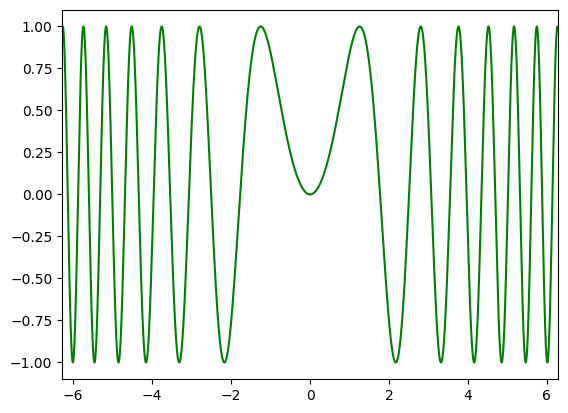

In [137]:
x = symbol('x')
y = symbol('y')
plot(sin(x ** 2), (x, -2 * PI, 2 * PI), color="g")
# plot(Z(2), xlim=(-2, 2), color="r")

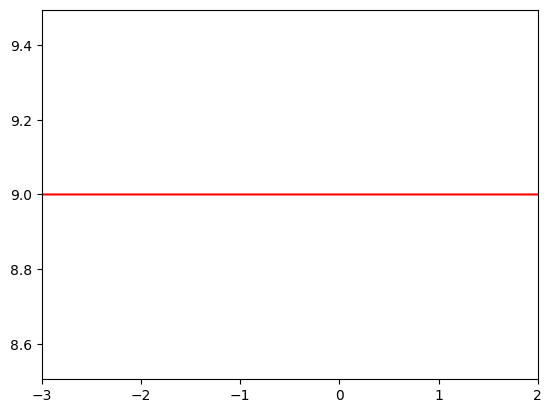

In [138]:
x = symbol('x')
y = symbol('y')
plot(Z(9), (None,-3, 2), color="r")

* (дополнительное задание) Проверьте работу функции `plot` на выражении, не содержащем переменной (т.е. на константном выражении), например, на выражении `f = Z(1)`. Исправьте функцию `plot`, чтобы она корректно работала с константными выражениями.

* (дополнительное задание) добавьте в функцию `plot` различные визуальные параметры - цвет кривой, тип кривой, толщина, метка (легенда) и т.д.

* Напишите функцию `plot_fam` для построения семейства графиков выражения, зависящего не только от переменной, но и от некоторого параметра. На вход данной функции дополнительно нужно подать кортеж `fam`, состоящий из четырех элементов: символ параметра, нижний предел, верхний предел, шаг.

In [139]:
def plot_fam(y: Expression, x: tuple, fam: tuple, ylim: tuple = ()):
  a = fam[1]
  while a <= fam[2]:
    plot(y + Z(a), x, ylim)
    a += fam[3]

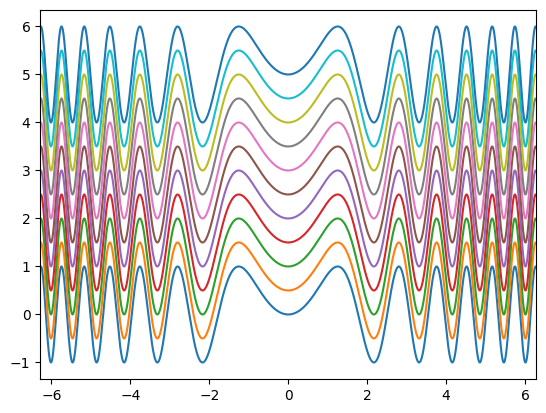

In [140]:
x = symbol('x')
y = symbol('y')
plot_fam(sin(x ** 2), (x, -2 * PI, 2 * PI), (y, 0, 5, 0.5))

* По аналогии с функций `plot` напишете фунцию `parametric_plot` для построения графика функции в параметрической форме и функцию `parametric_plot_fam` для построения семейства графиков функции в параметрической форме (с дополнительным параметром для семейства).

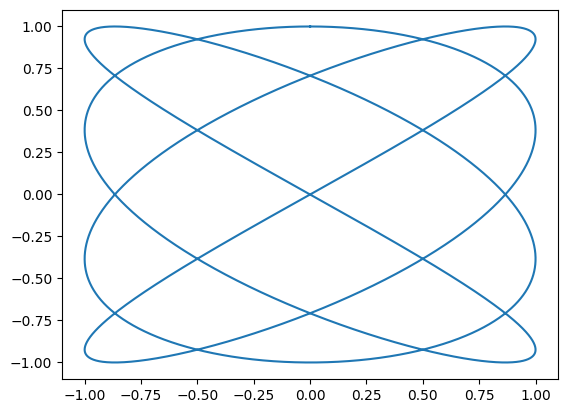

In [141]:
def parametric_plot(f: list, t: tuple):
  f1 = pycode(f[0], [t[0]]) # преобразуем выражение в функцию Python
  f2 = pycode(f[1], [t[0]]) # преобразуем выражение в функцию Python
  a, b = evalf(t[1]), evalf(t[2]) # вычисляем пределы
  T = np.linspace(a, b, 10000)
  X = f1(T) # сетка по x
  Y = f2(T) # значения функции на сетке
  # if ylim: # пределы по y, если указана опция
  #   plt.ylim(*ylim)
  # plt.xlim(a, b) # пределы по x
  plt.plot(X, Y) # строим график

t = symbol('t')
parametric_plot([sin(2 * t), sin(PI / 2 + 3 * t/ 2 )], (t, 0, 4 * PI))

* (дополнительное задание) Напишите функцию построения графика семейства параметрически заданных кривых.

In [142]:
def parametric_plot_fam(f: list, t: tuple, fam: tuple):
  a1 = fam[0][1]
  while a1 <= fam[0][2]:
    a2 = fam[1][1]
    while a2 <= fam[1][2]:
      parametric_plot([f[0] + Z(a1), f[1] + Z(a2)], t)
      a2 += fam[1][3]
    a1 += fam[0][3]

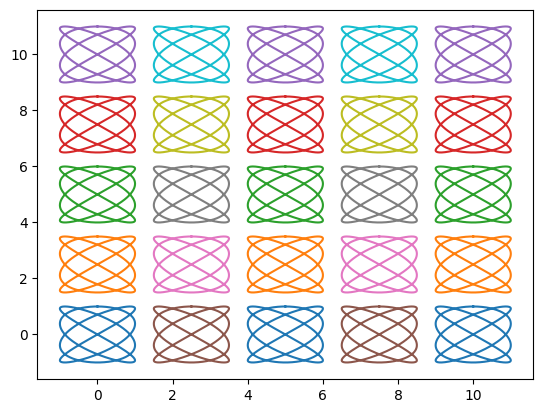

In [143]:
t = symbol('t')
a1 = symbol('a1')
a2 = symbol('a2')
parametric_plot_fam([sin(2 * t), sin(PI / 2 + 3 * t/ 2 )], (t, 0, 4 * PI), ((a1, 0, 10, 2.5), (a2, 0, 10, 2.5)))

* (дополнительное задание) Напишите функцию построения графиков в полярной системе координат.

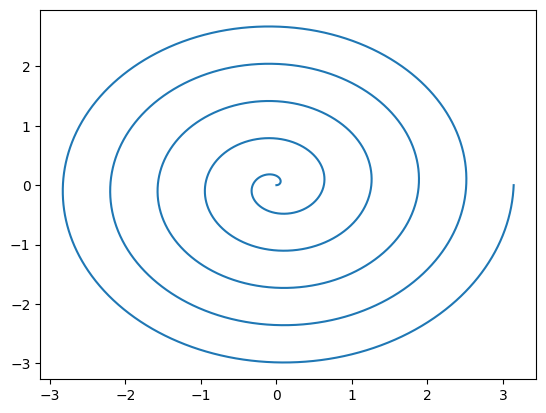

In [144]:
def polar_plot(R: Expression, phi: tuple):
  f = pycode(R, [phi[0]]) # преобразуем выражение в функцию Python
  a, b = evalf(phi[1]), evalf(phi[2]) # вычисляем пределы
  T = np.linspace(a, b, 10000)
  X = f(T) * np.cos(T) # сетка по x
  Y = f(T) * np.sin(T) # значения функции на сетке
  # if ylim: # пределы по y, если указана опция
  #   plt.ylim(*ylim)
  # plt.xlim(a, b) # пределы по x
  plt.plot(X, Y) # строим график

r, alpha = symbol('r'), symbol('alpha')
polar_plot(alpha / 10, (alpha, 0, 10 * PI))

* (дополнительное задание) Напишите функцию построения графика семейства кривых в полярной системе координат.

In [145]:
def polar_plot_fam(R: Expression, phi: tuple, fam: tuple):
  a = fam[1]
  while a <= fam[2]:
    polar_plot(R + Z(a), phi)
    a += fam[3]

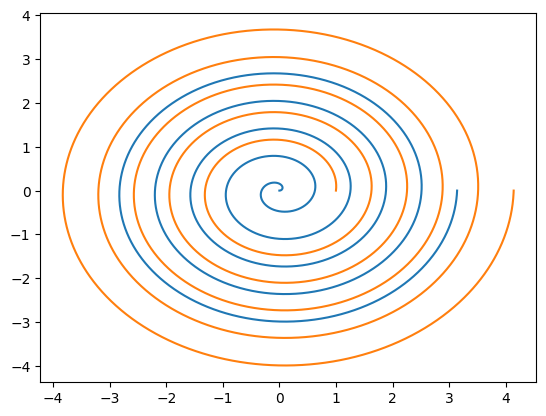

In [146]:
t = symbol('t')
r, alpha = symbol('r'), symbol('alpha')
polar_plot_fam(alpha / 10, (alpha, 0, 10 * PI), (t, 0, 1, 1))

* Для построения графиков неявно заданных функций можно использовать функцию построения контурных графиков пакета `matplotlib`. Функция в этом случае задается равенством (см. пример ниже), преобразуем это равенство в разность левой и правой части и строим линии уровня (контур) для нулевого значения этой разности:
$$L(x) = R(x) \,\to\, F(x) = L(x) - R(x) \,\to\, F(x) = 0.$$  
На вход функции `implicit_plot` должны подаваться два кортежа для обеих переменных (и имени функции, и имени переменной).

In [147]:
def implicit_plot(f: Expression, x: tuple, y: tuple):
  lhs, rhs = Expression((f.T)[1]), Expression((f.T)[2]),
  F = pycode(lhs - rhs, [x[0], y[0]])
  # формируем две сетки по осям
  xgrid = np.linspace(evalf(x[1]), evalf(x[2]), 100)
  ygrid = np.linspace(evalf(y[1]), evalf(y[2]), 100)
  # преобазуем эти сетки в двумерную сетку
  X, Y = np.meshgrid(xgrid, ygrid)
  # вычисляем функцию
  Z = F(X, Y)
  # задаем одинаковый масштаб по осям
  plt.gca().set_aspect('equal')
  # строим один контур для значения F = 0.0
  plt.contour(X, Y, Z, [0.0])

* Проверяем:

<IPython.core.display.Math object>

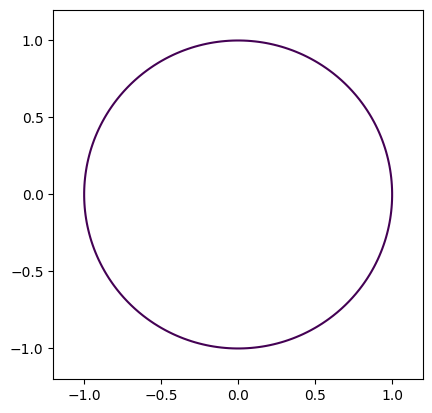

In [148]:
x, y = symbol('x'), symbol('y')
f = x ** 2 + y ** 2 == 1
show(f)
a = 1.2
implicit_plot(f, (x, -a, a), (y, -a, a))

* (дополнительное задание) Напишите функцию построения семейства неявно заданных функций

In [149]:
def implicit_plot_fam(f: Expression, x: tuple, y: tuple, fam: tuple):
  a = fam[1]
  while a <= fam[2]:
    implicit_plot(f == Z(a), x, y)
    a += fam[3]

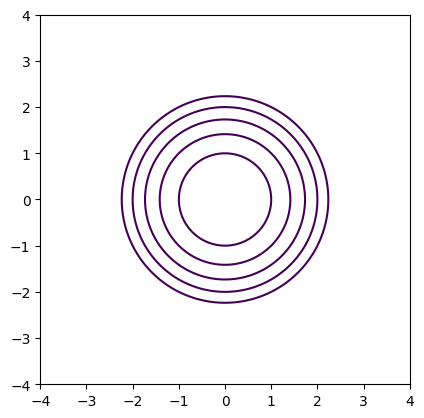

In [150]:
x, y = symbol('x'), symbol('y')
f = x ** 2 + y ** 2
a = 4
implicit_plot_fam(f, (x, -a, a), (y, -a, a), (t, 0, 5, 1))

* Графики функций двух переменных (т.е. поверхности) можно строить с помощью функции `plot_surface` пакета `matplotlib`. В остальном схема работы функции
`surface_plot` аналогична предыдущей функции `implicit_plot`.

In [151]:
# пакет для трехмерной графики
from mpl_toolkits import mplot3d

def surface_plot(z: Expression, x: tuple, y: tuple):
  xgrid = np.linspace(evalf(x[1]), evalf(x[2]), 100)
  ygrid = np.linspace(evalf(y[1]), evalf(y[2]), 100)

  X, Y = np.meshgrid(xgrid, ygrid)
  f = pycode(z, [x[0], y[0]])
  Z = f(X, Y)

  fig = plt.figure(figsize = (6, 5))
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap = plt.cm.autumn, linewidth=0)


* Проверяем:

<IPython.core.display.Math object>

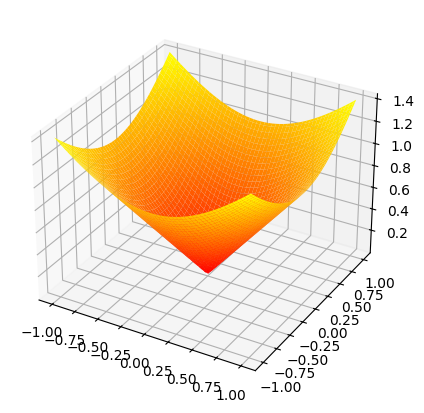

In [152]:
x, y = symbol('x'), symbol('y')
f = (x ** 2 + y ** 2) ** Q(1, 2)
show(f)
surface_plot(f, (x, -1, 1), (y, -1, 1))

* (дополнительное задание) По аналогии с последними двумя функциями напишите функцию `contour_plot` построения линий уровня (контуров) заданной функции двух переменных.

In [153]:
def contour_plot(z: Expression, x: tuple, y: tuple):
  xgrid = np.linspace(evalf(x[1]), evalf(x[2]), 100)
  ygrid = np.linspace(evalf(y[1]), evalf(y[2]), 100)

  X, Y = np.meshgrid(xgrid, ygrid)
  f = pycode(z, [x[0], y[0]])
  Z = f(X, Y)

  fig = plt.figure(figsize = (6, 5))
  ax = plt.axes(projection='3d')
  ax.contour(X, Y, Z, cmap = plt.cm.autumn)

<IPython.core.display.Math object>

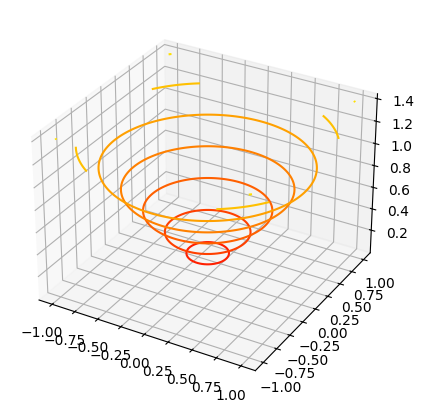

In [154]:
x, y = symbol('x'), symbol('y')
f = (x ** 2 + y ** 2) ** Q(1, 2)
show(f)
contour_plot(f, (x, -1, 1), (y, -1, 1))

# Лекция 6

### Дифференцирование


* Создадим специальную операцию `derivative` для визуализации производных (не для вычисления), чтобы можно было включать производные в выражения: $\dfrac{dy}{dx} = 2y - x$.

In [155]:
def derivative(f: Expression, x: Expression) -> Expression:
  return Expression(derivative_(f.T, x.T))

def derivative_(f: tuple, x: tuple) -> tuple:
  return 'derivative', f, x, {}

def latex_derivative(f: tuple) -> str:
  y, x = latex_(f[1]), latex_(f[2])
  if ID(f[1]) != 'symbol':
    y = enclose(y)
  return f"\\frac{{d{y}}}{{d{x}}}"

x, y = symbol('x'), symbol('y')
show(derivative(y, x))

<IPython.core.display.Math object>

* Создадим набор функций для дифференцирования выражений, головная функция принимает на вход выражение и переменную (оба аргумента типа `Expression`) и вызывает соответствующую функцию для списочных выражений. Последняя формирует команду дифференцирования заданного типа узла и применяет ее к текущему узлу и заданной переменной дифференцирования.  

In [156]:
def diff(f: Expression, x: Expression) -> Expression:
  return Expression(diff_(fix(f).T, x.T))

def diff_(f: tuple, x: tuple) -> tuple:
  try:
    cmd = eval(f"diff_{ID(f)}")
    return cmd(f, x)
  except:
    return derivative_(f, x)

x = symbol('x')
show(diff(x + 1, x))

<IPython.core.display.Math object>

* Напишите функции дифференцирования целых и рациональных чисел, констант (все производные равны нулю), символов переменных - если этот символ совпадает с символом переменной дифференцирования, то результат - 1 (целое число), иначе - 0.  

In [157]:
def diff_integer(f: tuple, x: tuple) -> tuple:
  return integer_(0)

def diff_rational(f: tuple, x: tuple) -> tuple:
  return rational_(0)

def diff_const(f: tuple, x: tuple) -> tuple:
  return const_(0)

def diff_symbol(f: tuple, x: tuple) -> tuple:
  if f == x:
    return integer_(1)
  return integer_(0)

* Проверяем:

In [158]:
x, y = symbol('x'), symbol('y')
show(diff(1, x))
show(diff(x, x))
show(diff(y, x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Пишем функцию дифференцирования операции сложения.

In [159]:
def diff_add(f: tuple, x: tuple) -> tuple:
  da, db = diff_(f[1], x), diff_(f[2], x) # Дифференцируем операнды
  return add_(da, db) # формируем производную

x = symbol('x')
show(diff(x + 1, x))
show(evaluate(diff(x + 1, x)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* По аналогии с предыдущей функцией напишите функции дифференцирования остальных операций - вычитание, умножение, деление, отрицание, возведение в степень. Для возведения в степень используйте общую формулу (когда и основание, и показатель степени являются функциями заданной переменной):
$$\left(y^z\right)' = \ln y\cdot y^z\cdot z' + z\cdot y^{z-1}\cdot y'.$$

In [160]:
def diff_sub(f: tuple, x: tuple) -> tuple:
   da, db = diff_(f[1], x), diff_(f[2], x) # Дифференцируем операнды
   return sub_(da, db) # формируем производную

def diff_mul(f: tuple, x: tuple) -> tuple:
    da, db = diff_(f[1], x), diff_(f[2], x) # Дифференцируем операнды
    return add_(mul_(da, f[2]), mul_(f[1], db)) # формируем производную

def diff_div(f: tuple, x: tuple) -> tuple:
    a, b = f[1], f[2]
    da, db = diff_(f[1], x), diff_(f[2], x) # Дифференцируем операнды
    return div_(sub_(mul_(da, f[2]), mul_(f[1], db)), deg_(b, integer_(2))) # формируем производную

def diff_deg(f: tuple, x: tuple) -> tuple:
    a, b = f[1], f[2]
    da, db = diff_(f[1], x), diff_(f[2], x) # Дифференцируем операнды
    return add_(mul_(ln_(a), mul_(deg_(a, b), db)), mul_(b, mul_(deg_(a, sub_(b, integer_(1))), da))) # формируем производную

def diff_neg(f: tuple, x: tuple) -> tuple:
    da = diff_(f[1], x) # Дифференцируем операнды
    return neg_(da) # формируем производную

* Проверяем:

In [161]:
x = symbol('x')
f = x / (2 * x + 1)
show(derivative(f, x) == diff(f, x))

<IPython.core.display.Math object>

In [162]:
x = symbol('x')
f = x**x
show(derivative(f, x) == diff(f, x))

<IPython.core.display.Math object>

* Вычисляем производную функции $\sin x$:

In [163]:
def diff_sin(f: tuple, x: tuple) -> tuple:
  a = f[1]
  da = diff_(a, x)
  return mul_(cos_(a), da)

f = 2 * x
show(diff(sin(f), x))

<IPython.core.display.Math object>

* По аналогии с функцией $\sin{x}$ напишите функции вычисления производных остальных элементарных функций.

In [164]:
def diff_cos(f: tuple, x: tuple) -> tuple:
  a = f[1]
  da = diff_(a, x)
  return mul_(neg_(sin_(a)), da)

f = 2 * x
show(diff(cos(f), x))

<IPython.core.display.Math object>

In [165]:
def diff_exp(f: tuple, x: tuple) -> tuple:
  a = f[1]
  da = diff_(a, x)
  return mul_(exp_(a), da)

f = 2 * x
show(diff(exp(f), x))

<IPython.core.display.Math object>

In [166]:
def diff_ln(f: tuple, x: tuple) -> tuple:
  a = f[1]
  da = diff_(a, x)
  return mul_(div_(integer_(1), a), da)

f = 2 * x
show(diff(ln(f), x))

<IPython.core.display.Math object>

* Проверяем:

In [167]:
x = symbol('x')
f = diff(exp(x) + x * ln(1 + x), x)
show(f)
show(evaluate(subs(f, {x: 0})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (дополнительное задание) Формула Тейлора

* Напишите набор функций для представления, визуализации и оценивания факториалов целых неотрицательных чисел:
  * `show(factorial(6))` $\to 6!$
  * `show(factorial(n + 1))` $\to (n+1)!$
  * `show(evaluate(factorial(6)))` $\to 720$
  * `evalf(factorial(6))` $\to$  `720.0`

* Факториал числа можно вычислить с помощью функции `factorial` пакета `math`



In [168]:
import math

def showFact(factorial_expression):
    """Функция для визуализации факториала."""
    if isinstance(factorial_expression, int):
        return f"{factorial_expression}!"
    elif isinstance(factorial_expression, str):
        return factorial_expression
    else:
        raise ValueError("Неверный тип выражения")

def evaluate(factorial_expression):
    """Функция для оценки значения факториала."""
    if isinstance(factorial_expression, int):
        return math.factorial(factorial_expression)
    else:
        raise ValueError("Неверный тип выражения")

def evalf(factorial_expression):
    """Функция для оценки значения факториала с плавающей запятой."""
    if isinstance(factorial_expression, int):
        return float(math.factorial(factorial_expression))
    else:
        raise ValueError("Неверный тип выражения")

# Примеры использования
n = 6

# Визуализация факториала
print(showFact(n))  # Вывод: 6!
print(showFact('n + 1'))  # Вывод: n + 1!

# Оценка значения факториала
print(showFact(evaluate(n)))  # Вывод: 720
print(evalf(n))  # Вывод: 720.0

6!
n + 1
720!
720.0


* Напишите функцию `taylor_series` построения формулы Тейлора для заданных: функции $f(x)$, переменной $x$, точки $x=a$, порядка $n$:
$$f(x) \to \sum_{k=0}^{n}\dfrac{f^{(k)}(a)}{k!}(x-a)^k.$$
Необходим в цикле вычислить $n$ производных, в каждую из них подставить вместо $x$ значение $a$ и оценить (`evaluate`). Из полученных значений и соответствующих факториалов собрать коэффициенты многочлена, создать и вернуть многочлен для "переменной" $x-a$:
  * `taylor_series(f, sin(x), Z(0), 6)` $\to \frac{1}{{1!}} \cdot x + \frac{-1}{{3!}} \cdot {x} ^ {3} + \frac{1}{{5!}} \cdot {x} ^ {5}$
  * `taylor_series(f, ln(1 + x), Z(1), 3)` $\to \frac{1}{{1!}} \cdot \left( x - 1 \right) + \frac{-1}{{2!}} \cdot {\left( x - 1 \right)} ^ {2} + \frac{2}{{3!}} \cdot {\left( x - 1 \right)} ^ {3}$

In [169]:
# def taylor_series(f: Expression, x: Expression, a: Expression, n: int) -> Expression:
#   ...

# x = symbol('x')
# t1 = taylor_series(sin(x), x, Z(0), 6)
# show(t1)
# show(evaluate(t1))

# t2 = taylor_series(ln(1 + x), x, Z(1), 3)
# show(t2)
# show(evaluate(t2))


### Упрощение выражений

* Создаем набор функций для представления сумм и произведений. Сумма - это линейная комбинация нескольких (больше одного) значений, первым из которых всегда является рациональное число, произведение - произведение несколькиз степеней (больше одной), первым множителем является рациональное число:
  * `sum([u0, u1, u2, u3, u4, ...])` $\to u_0 + u_1 \cdot u_2 + u_3 \cdot u_4 + \dots$
  * `product([u0, u1, u2, u3, u4, ...])` $\to u_0 \cdot u_2 ^ {u_1} \cdot u_4 ^ {u_4} \cdot \dots$
* Коэффициенты в суммах и степени в произведениях являются рациональными числами.
* Данные функции необходимы только для внутреннего использования (не для пользователей), поэтому представление их в виде формул можно сделать чисто техническим (со всеми скобками и т.д.).

In [170]:
def sum_(A: list) -> tuple:
  if len(A) == 1:
    return A[0] # если длина списка 1, то это просто рациональное число A[0]
  if len(A) == 3 and A[0] == rational_(0, 1):
    return simp_mul(mul_(A[1], A[2])) # если два слагаемых, из которых первое - ноль, то результат - второе слагаемое (суммы нет)
  return 'sum', *A, {} # общий случай, более одного нетривиальных слагаемых

def latex_sum(x: tuple) -> str:
  A = [f"{{{enclose(latex_(a))}}}" for a in items(x)]
  T = [A[0]] + ['\\cdot'.join([A[i], A[i+1]]) for i in range(1, len(A), 2)]
  return '+'.join(T)

f = sum_([integer_(1), rational_(1, 2), symbol_('x')])
show(Expression(f))

<IPython.core.display.Math object>

In [171]:
def prod_(A: list) -> tuple:
  if A[0] == rational_(0, 1):
    return rational_(0, 1) # если числовой коэффициент ноль, то все произведение ноль
  if len(A) == 1:
    return A[0]  # если длина списка 1, то это просто рациональное число A[0]
  if len(A) == 3 and A[0] == rational_(1, 1):
    return simp_deg(deg_(A[2], A[1])) # если два множителя, из которых первый - 1, то результат - второй множитель (произведения нет)
  return 'prod', *A, {} # общий случай

def latex_prod(x: tuple) -> str:
  A = [f"{{{enclose(latex_(a))}}}" for a in items(x)]
  T = [A[0]] + ['^'.join([A[i+1], A[i]]) for i in range(1, len(A), 2)]
  return '\\cdot'.join(T)

f = prod_([integer_(1), rational_(1, 2), symbol_('x')])
show(Expression(f))

<IPython.core.display.Math object>

* Пишем общую функцию слияния двух сумм или произведений при выполнении над ними арифметической операции (сложение и вычитание для сумм, умножение и деление для произведений). Цель слияния - объединение общих членов этих сумм или произведений:
  * $(1 + 2 \cdot x) + (2 + 4 \cdot x + 1 \cdot x^2) \to 3 + 6 \cdot x + 1 \cdot x ^2$;
  * $(1 + 2 \cdot x) - (2 + 4 \cdot x + 1 \cdot x^2) \to (-1) + (-2) \cdot x + (-1) \cdot x ^2$;
  * $(2\cdot x^3) \times (3\cdot (x+1)^{-2}\cdot x^2) \to 6 \cdot (x+1)^{-2}\cdot x^5$
  * $(2\cdot x^3) \div (3\cdot (x+1)^{-2}\cdot x^2) \to \frac23 \cdot (x+1)^{2}\cdot x^1$
* При сложении мы складываем все числовые коэффициенты, при вычитании - вычитаем, при умножении: умножаем первые коэффициенты и складываем все остальные (т.е. показатели степеней), при деление - делим первые коэффициенты, вычитаем все остальные.
* Если какой-то из коэффициентов в результате операции сложения (вычитания) оказался равен нулю, то соответствующая пар (коэффициент-элемент) в итоговый список не включается.
* На вход функции подаются два списка (слагаемых или множителей), и две операции (для первых коэффициентов и для всех остальных). На выходе - объединенный список.   


In [172]:
OPS = {'+': add_rational_rational,
       '-': sub_rational_rational,
       '*': mul_rational_rational,
       '/': div_rational_rational}

def neg_rational(x: tuple) -> tuple:
  n, m = options(x)['num'], options(x)['denom']
  return rational_(-n, m)

def merge_longs(A: list, B: list, op1: str, op2: str) -> list:
  i, j, C = 1, 1, [OPS[op1](A[0], B[0])]
  while i < len(A) or j < len(B):
    ka = str(A[i + 1]) if i < len(A) else ')'
    kb = str(B[j + 1]) if j < len(B) else ')'
    if ka < kb:
      C, i = C + [A[i], A[i + 1]], i + 2
    elif ka > kb:
      k = B[j] if op2 == '+' else neg_rational(B[j])
      C, j = C + [k, B[j + 1]], j + 2
    else:
      k = OPS[op2](A[i], B[j])
      if k != rational_(0, 1):
        C += [k, A[i + 1]]
      i, j = i + 2, j + 2
  return C

* Проверяем, как работает функция `merge`:

In [173]:
x, y = symbol_('x'), symbol_('y')
A = [rational_(1, 2), rational_(3, 1), sin_(x), rational_(1, 1), x]
B = [rational_(2, 3), rational_(-3, 1), sin_(x), rational_(2, 1), x, rational_(1, 4), y]
print('Деление выражений')
show(Expression(div_(prod_(A), prod_(B))))
print()
C = merge_longs(A, B, '/', '-')
show(Expression(prod_(C)))
print('Умножение тех же выражений')
show(Expression(mul_(prod_(A), prod_(B))))
print()
C = merge_longs(A, B, '*', '+')
show(Expression(prod_(C)))

Деление выражений


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Умножение тех же выражений


<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Создаем набор функций для упрощения выражений: головная функция выполняет 1) оценивание текущего выражения (т.е. выполнение всех возможных арифметических операций и оценивание функций, если это возможно); 2) упрощает выражение (функция `simp_`) и выполняет ренормализацию (функция `renorm_`), т.е. преобразование выражения с суммами и произведениями в классические выражения с бинарными арифметическими операциями. Функция `simp_` упрощает рекурсивно все аргументы текущего узла и вызывает обработчик этого узла. Функция `renorm_` выполняет те же действия, но для ренормализации выражения.  

In [174]:
def simplify(x: Expression) -> Expression:
  return Expression(renorm_(simp_(eval_(fix(x).T)))) # FIX EVAL_BINARY!!!

def simp_(x: tuple) -> tuple:
  x = ID(x), *[simp_(a) for a in items(x)], options(x)
  try:
    return eval(f"simp_{ID(x)}")(x)
  except:
    return x

def renorm_(x: tuple) -> tuple:
  x = ID(x), *[renorm_(a) for a in items(x)], options(x)
  try:
    return eval(f"renorm_{ID(x)}")(x)
  except:
    return x

* Для упрощения кода преобразуем все целые числа в рациональные:

In [175]:
def simp_integer(x: tuple) -> tuple:
  return cast_integer_rational(x)

* Пишем две служебные функции для преобразования выражений в суммы и произведения (результат их работы - соответствующие списки).

In [176]:
def to_sum(x: tuple) -> list:
  if ID(x) == 'sum': return list(items(x))
  if ID(x) == 'rational': return [x]
  if ID(x) == 'prod':
    A = to_prod(x)
    return [rational_(0, 1), A[0], prod_([rational_(1, 1)] + A[1:])]
  return [rational_(0, 1), rational_(1, 1), x]

def to_prod(x: tuple) -> list:
  if ID(x) == 'prod': return list(items(x))
  if ID(x) == 'rational': return [x]
  if ID(x) == 'deg' and ID(x[2]) == 'rational':
    return [rational_(1, 1), x[2], x[1]]
  return [rational_(1, 1), rational_(1, 1), x]

* Функции `simp_add` и `simp_sub` преобразуют свои аргументы к суммам и выполняют слияние двух соответствующих списков.

In [177]:
def simp_add(x: tuple) -> tuple:
  A, B = to_sum(x[1]), to_sum(x[2])
  return sum_(merge_longs(A, B, '+', '+'))

def simp_sub(x: tuple) -> tuple:
  A, B = to_sum(x[1]), to_sum(x[2])
  return sum_(merge_longs(A, B, '-', '-'))

* Обрабочики умножения и деления. В частном случае, если один операнд умножения - число, второй - сумма, то выполняем раскрытие скобок. То же самое для деления, если первый делимое - сумма, а делитель - число.

In [178]:
def simp_mul(x: tuple) -> tuple:
  if ID(x[1]) == 'rational' and ID(x[2]) == 'sum':
    return mul_rational_sum(x[1], list(items(x[2])))
  if ID(x[2]) == 'rational' and ID(x[1]) == 'sum':
    return mul_rational_sum(x[2], list(items(x[1])))
  A, B = to_prod(x[1]), to_prod(x[2])
  return prod_(merge_longs(A, B, '*', '+'))

def mul_rational_sum(k: tuple, A: list) -> tuple:
  A[0] = mul_rational_rational(k, A[0])
  for i in range(1, len(A), 2):
    A[i] = mul_rational_rational(k, A[i])
  return sum_(A)

def simp_div(x: tuple) -> tuple:
  if ID(x[2]) == 'rational' and ID(x[1]) == 'sum':
    a = div_rational_rational(rational_(1, 1), x[2])
    return mul_rational_sum(a, list(items(x[1])))
  A, B = to_prod(x[1]), to_prod(x[2])
  return prod_(merge_longs(A, B, '/', '-'))

* Упрощение отрицания (унарный минус) - заменяем эту операцию на умножение на $-1$ и упрощаем эту операцию.

In [179]:
def simp_neg(x: tuple) -> tuple:
  A, B = to_prod(rational_(-1, 1)), to_prod(x[1])
  return prod_(merge_longs(A, B, '*', '+'))

* Упрощаем операцию возведения в степень: $1^x \to 1$, $x^0\to 1$, $x^1\to x$, $(x^y)^z \to x^{y\cdot z}$. Если основание прои

In [180]:
def simp_deg(x: tuple) -> tuple:
  a, b = x[1], x[2]
  if a == rational_(1, 1) or b == rational_(0, 1):
    return rational_(1, 0)
  if b == rational_(1, 1):
    return a
  if ID(a) == 'deg':
    c = simp_mul(mul_(a[2], b))
    return deg_(a[1], c)
  if ID(a) == 'prod':
    A = to_prod(a)
    A[0] = eval_(deg_(A[0], b))
    for i in range(1, len(A), 2):
      A[i] = simp_mul(mul_(A[i], b))
    return prod_(A)
  return x

* Проверяем:

In [181]:
x = symbol('x')
y = symbol('y')
z = symbol('z')
f = x**1
show(f)
show(simplify(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Пишем функции ренормализации сумм и произведений. Для сумм используем написанную ранее функцию построения линейной комбинации. Для произведения создаем новую функцию, которая делит все множители на те, которые останутся в числителе (с положительными степенями), и на те, которые уйдут в знаменатель (с отрицательными степенями). Далее из этих множителей формируем два произведения, а из них дробь (если есть знаменатель).

In [182]:
def renorm_sum(x: tuple) -> tuple:
  X = list(items(x))
  A, B = X[1::2] + [X[0]], X[2::2] + [rational_(1, 1)]
  return linear_combination(A, B)

def renorm_prod(x: tuple) -> tuple:
  X = list(items(x))
  k = X[0]
  N, M = split_prod_terms(X[1::2], X[2::2])
  if M == []:
    if k == rational_(1, 1): return mul_terms(N)
    else: return mul_terms([k] + N)
  elif N == []:
    if k == rational_(1, 1): return div_(rational_(1, 1), mul_terms(M))
    else: return mul_(k, div_(rational_(1, 1), mul_terms(M)))
  if k == rational_(1, 1): return div_(mul_terms(N), mul_terms(M))
  return mul_(k, div_(mul_terms(N), mul_terms(M)))

def split_prod_terms(D: list, B: list) -> tuple:
  N, M = [], []
  for b, d in zip(B, D):
    if d == rational_(1, 1) : N.append(b)
    elif d == rational_(-1, 1): M.append(b)
    elif options(d)['num'] > 0: N.append(deg_(b, d))
    else: M.append(deg_(b, neg_rational(d)))
  return N, M

def mul_terms(A: list) -> tuple:
  r = A[0]
  for a in A[1:]:
    r = mul_(r, a)
  return r

* Итоговая проверка:

In [183]:
x = symbol('x')
f = 1 + x - 1 + 2 * x + x ** 2 + 3 - 4 * x + sin(x)
show(f)
g = simplify(f)
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [184]:
x = symbol('x')
f = 3 * x + 2 - 4 * (x - 2 * x + 1 - (x + 3 * x)) # Пример из лекции!
show(f)
show(simplify(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверка на вычислении производных (попробуйте выполнить **первые три** итерации этого цикла **без упрощения**):

In [185]:
f = sin(x ** 2)
for i in range(1):
  show(diff(f, x))
  f = simplify(diff(f, x))
  show(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>